# Initial EDA for Bank Marketing Classification Task form Kaggle 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("datasource/bank_data_model.csv")

In [5]:
df.head()

Unnamed: 0  age          job   marital  education default  balance housing  \
0        2236   32       admin.  divorced  secondary     yes      -18     yes   
1         858   34   technician    single   tertiary      no      144     yes   
2        3531   44   management  divorced   tertiary      no        0      no   
3        2737   34  blue-collar   married  secondary      no     8309     yes   
4        1257   51  blue-collar   married    primary      no     5050      no   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no   unknown   12   may       155         3     -1         0  unknown  no  
1  yes  cellular   14   oct       104         1     85        19  failure  no  
2   no  cellular   22   aug        54         2     -1         0  unknown  no  
3  yes  cellular   19   nov        50         1     -1         0  unknown  no  
4  yes   unknown   16   jun        75         7     -1         0  unknown  no

In [6]:
df = df.drop('Unnamed: 0', axis=1)

## Data info
Bank Client Data:

    age (numeric)
    job : Type of job (categorical:
    "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
    marital : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    education (categorical: "unknown","secondary","primary","tertiary")
    default: Has credit in default? (binary: "yes","no")
    balance: Average yearly balance, in euros (numeric)
    housing: Has housing loan? (binary: "yes","no")
    loan: Has personal loan? (binary: "yes","no")

Related with the Last Contact of the Current Campaign:

    contact: Contact communication type (categorical: "unknown","telephone","cellular")
    day: Last contact day of the month (numeric)
    month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
    duration: Last contact duration, in seconds (numeric)

Other Attributes:

    campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
    pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)
    previous: Number of contacts performed before this campaign and for this client (numeric)
    poutcome: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output Variable (Desired Target):

    y - Has the client subscribed to a term deposit? (binary: "yes","no")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3616 non-null   int64 
 1   job        3616 non-null   object
 2   marital    3616 non-null   object
 3   education  3616 non-null   object
 4   default    3616 non-null   object
 5   balance    3616 non-null   int64 
 6   housing    3616 non-null   object
 7   loan       3616 non-null   object
 8   contact    3616 non-null   object
 9   day        3616 non-null   int64 
 10  month      3616 non-null   object
 11  duration   3616 non-null   int64 
 12  campaign   3616 non-null   int64 
 13  pdays      3616 non-null   int64 
 14  previous   3616 non-null   int64 
 15  poutcome   3616 non-null   object
 16  y          3616 non-null   object
dtypes: int64(7), object(10)
memory usage: 480.4+ KB


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So we don't have any missing values

In [9]:
df.describe(include='all')

age         job  marital  education default       balance  \
count   3616.000000        3616     3616       3616    3616   3616.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         774     2223       1843    3547           NaN   
mean      41.043971         NaN      NaN        NaN     NaN   1403.934458   
std       10.464800         NaN      NaN        NaN     NaN   2811.286428   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN     NaN     65.000000   
50%       39.000000         NaN      NaN        NaN     NaN    450.500000   
75%       48.000000         NaN      NaN        NaN     NaN   1477.750000   
max       87.000000         NaN      NaN        NaN     NaN  42045.000000   

       housing  loan   contact          day month     duration     campaign  \
count     3616  3616      3616  3616.000000  3616  3616.000000  3616.000000   
unique       2     2         3          NaN    12          NaN          NaN   
top        yes    no  cellular          NaN   may          NaN          NaN   
freq      2055  3057      2336          NaN  1100          NaN          NaN   
mean       NaN   NaN       NaN    16.040929   NaN   263.769358     2.795354   
std        NaN   NaN       NaN     8.207003   NaN   260.675975     3.144846   
min        NaN   NaN       NaN     1.000000   NaN     4.000000     1.000000   
25%        NaN   NaN       NaN     9.000000   NaN   104.000000     1.000000   
50%        NaN   NaN       NaN    16.000000   NaN   185.000000     2.000000   
75%        NaN   NaN       NaN    21.000000   NaN   330.000000     3.000000   
max        NaN   NaN       NaN    31.000000   NaN  3025.000000    50.000000   

              pdays     previous poutcome     y  
count   3616.000000  3616.000000     3616  3616  
unique          NaN          NaN        4     2  
top             NaN          NaN  unknown    no  
freq            NaN          NaN     2947  3199  
mean      40.218473     0.545907      NaN   NaN  
std      100.170192     1.657239      NaN   NaN  
min       -1.000000     0.000000      NaN   NaN  
25%       -1.000000     0.000000      NaN   NaN  
50%       -1.000000     0.000000      NaN   NaN  
75%       -1.000000     0.000000      NaN   NaN  
max      871.000000    24.000000      NaN   NaN

In [10]:
num_features = [x for x in df.columns if pd.api.types.is_numeric_dtype(df[x])]
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
cat_features = [x for x in df.columns if not (pd.api.types.is_numeric_dtype(df[x]))]
cat_features               

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [12]:
df[num_features].describe()

age       balance          day     duration     campaign  \
count  3616.000000   3616.000000  3616.000000  3616.000000  3616.000000   
mean     41.043971   1403.934458    16.040929   263.769358     2.795354   
std      10.464800   2811.286428     8.207003   260.675975     3.144846   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     65.000000     9.000000   104.000000     1.000000   
50%      39.000000    450.500000    16.000000   185.000000     2.000000   
75%      48.000000   1477.750000    21.000000   330.000000     3.000000   
max      87.000000  42045.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  3616.000000  3616.000000  
mean     40.218473     0.545907  
std     100.170192     1.657239  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    24.000000

In [13]:
df[cat_features].describe()

job  marital  education default housing  loan   contact month  \
count         3616     3616       3616    3616    3616  3616      3616  3616   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           774     2223       1843    3547    2055  3057      2336  1100   

       poutcome     y  
count      3616  3616  
unique        4     2  
top     unknown    no  
freq       2947  3199

##### Correlation matrix

Text(0.5, 1.0, 'Correlation matrix for numeric features')

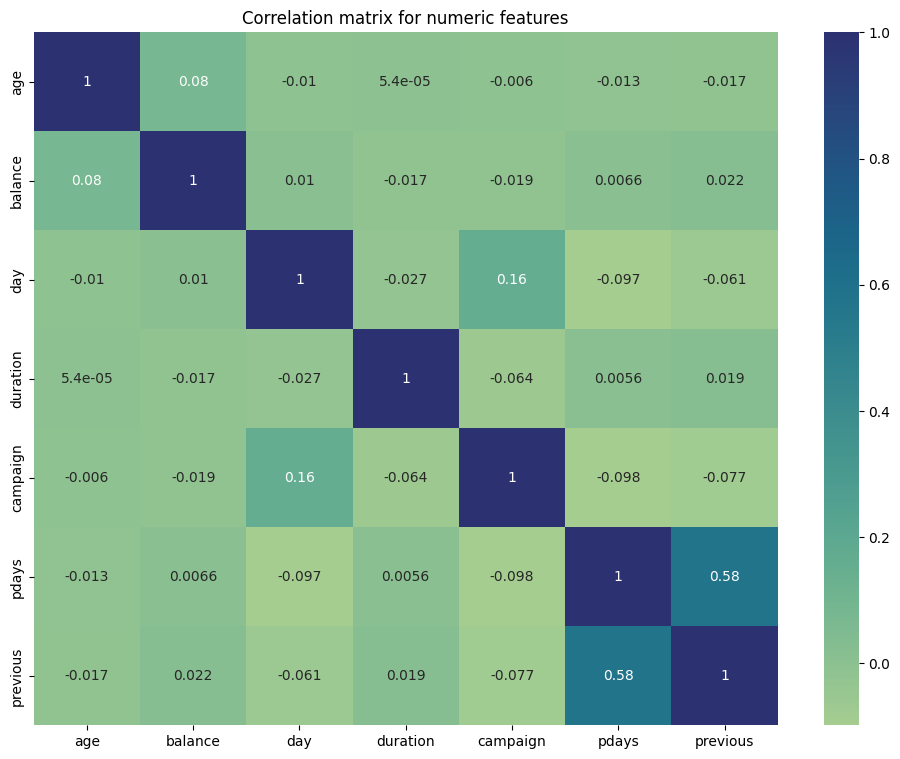

In [14]:
fix, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(df[num_features].corr(), annot=True ,cmap='crest', ax = ax)
ax.set_title("Correlation matrix for numeric features")

##### Histograms 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

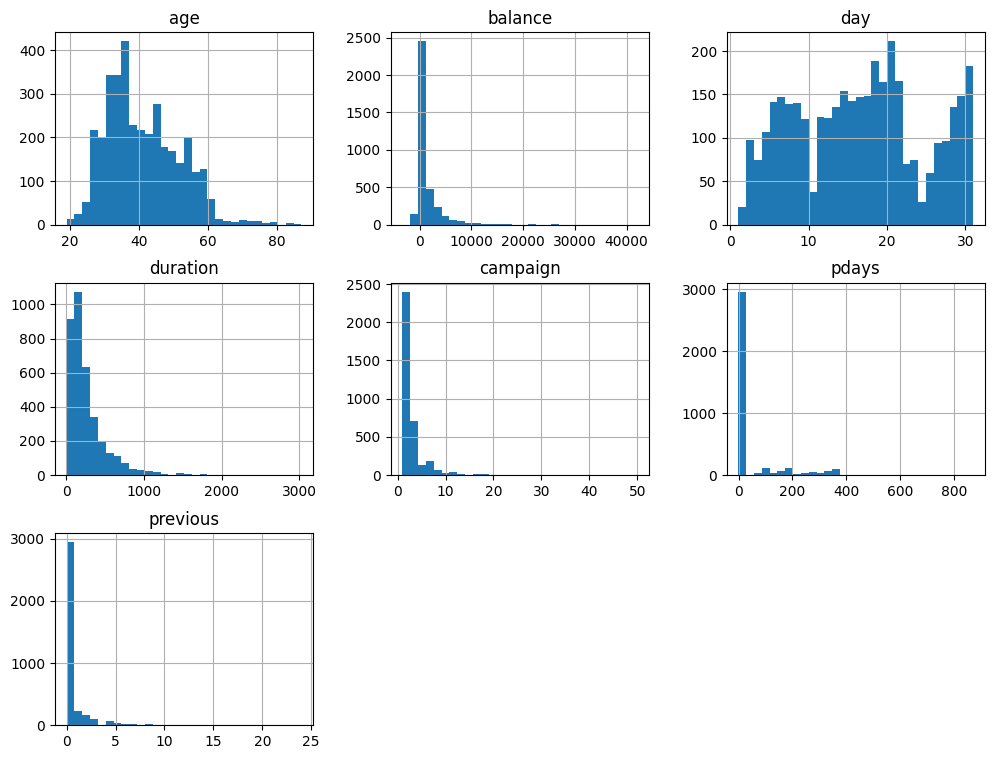

In [15]:
df.hist(figsize=(12, 9), bins=30)

##### Numerical variables analysis

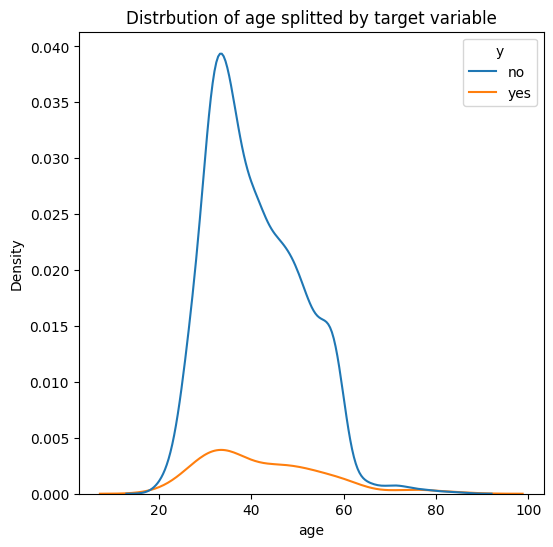

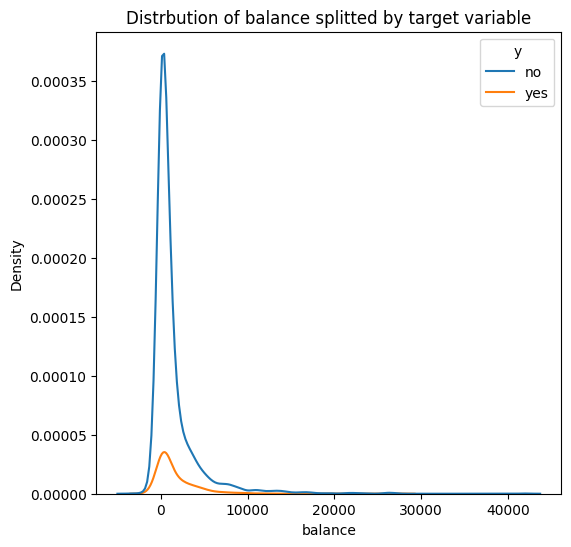

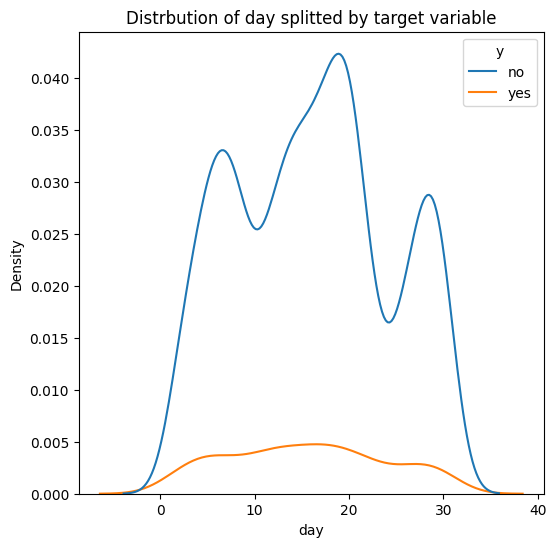

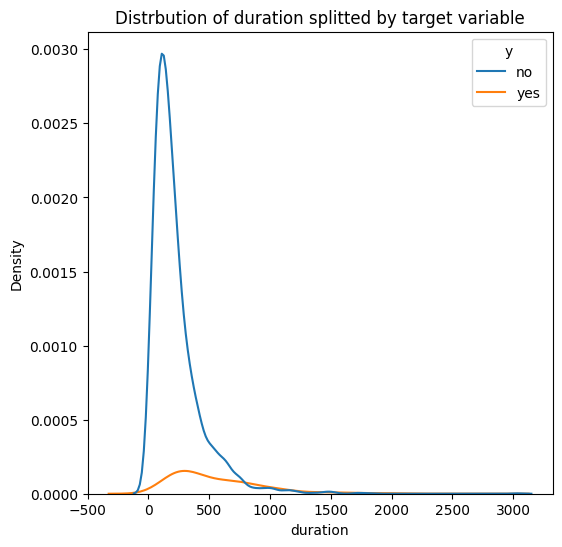

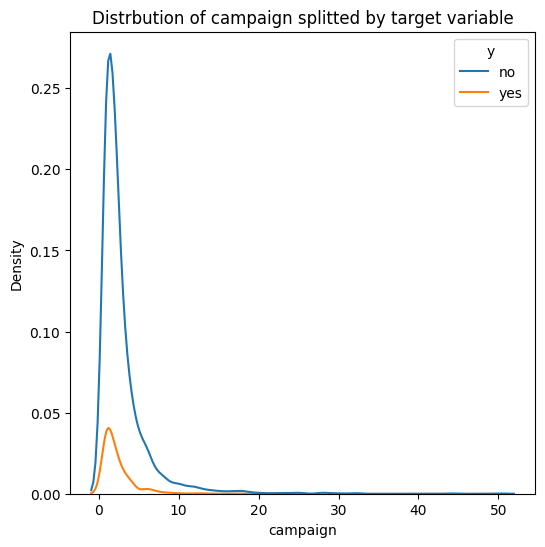

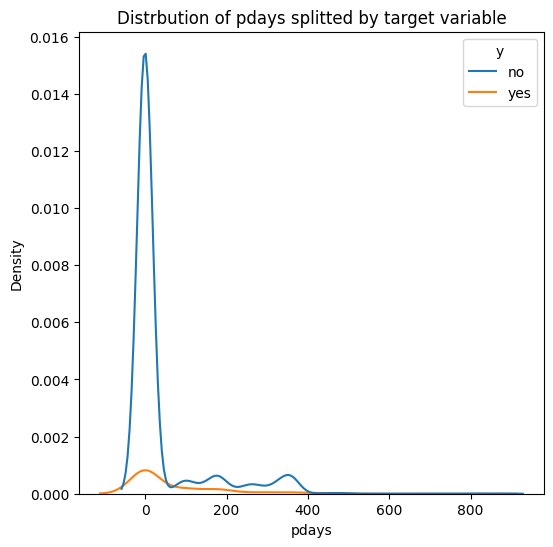

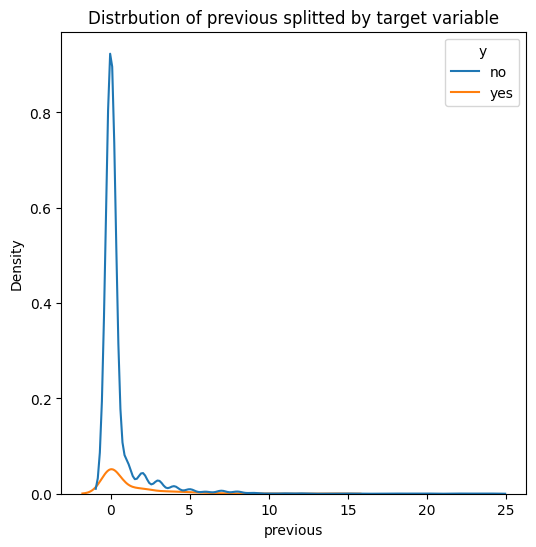

In [16]:
for col in num_features:
    plt.figure(figsize=(6, 6))
    ax = sns.kdeplot(data=df, x=col, hue='y')
    # plt.xticks(rotation=30)
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

<Axes: >

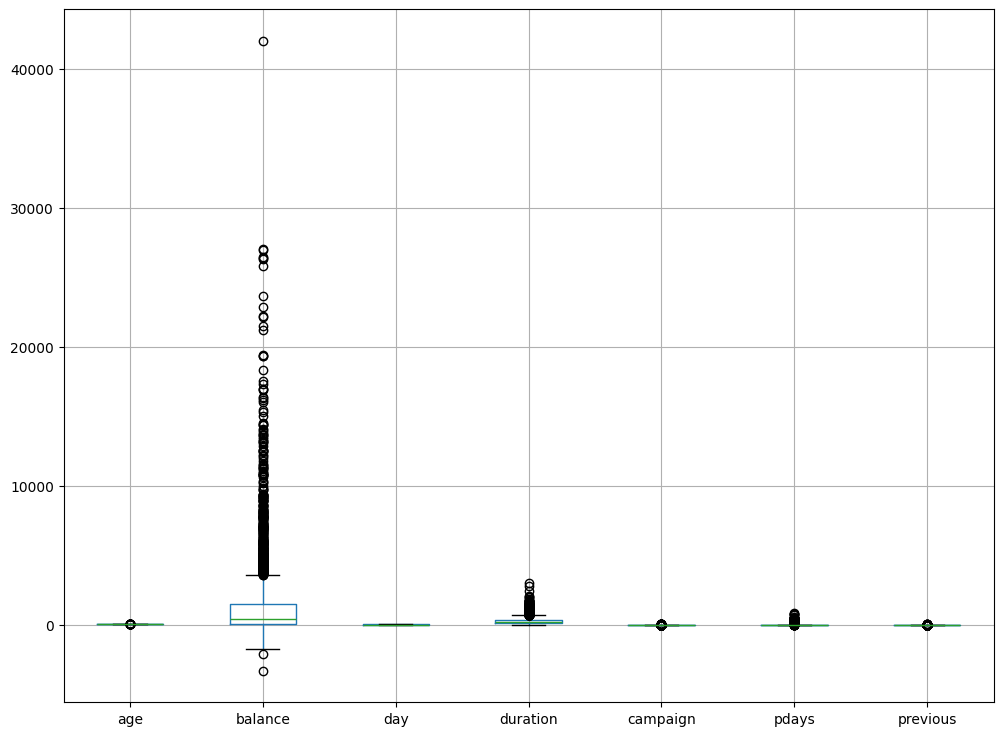

In [17]:
df.boxplot(figsize=(12, 9))

Lest's look closer on balance outlier

In [18]:
df.loc[df['balance'] == max(df['balance'])]

age           job  marital education default  balance housing loan  \
234   42  entrepreneur  married  tertiary      no    42045      no   no   

      contact  day month  duration  campaign  pdays  previous poutcome   y  
234  cellular    8   aug       205         2     -1         0  unknown  no

##### Categorical variables analysis

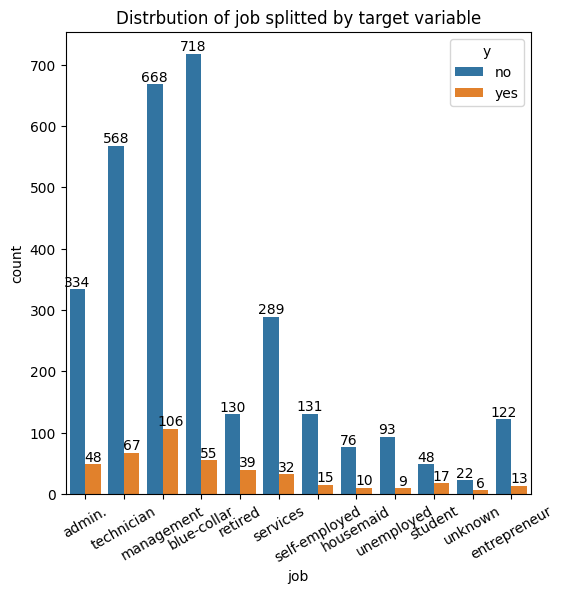

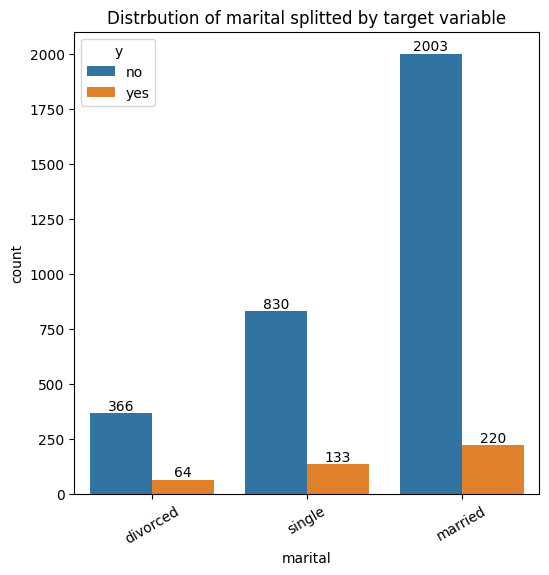

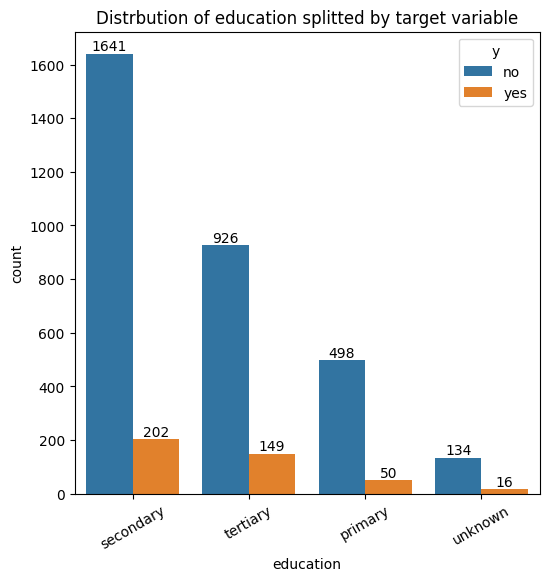

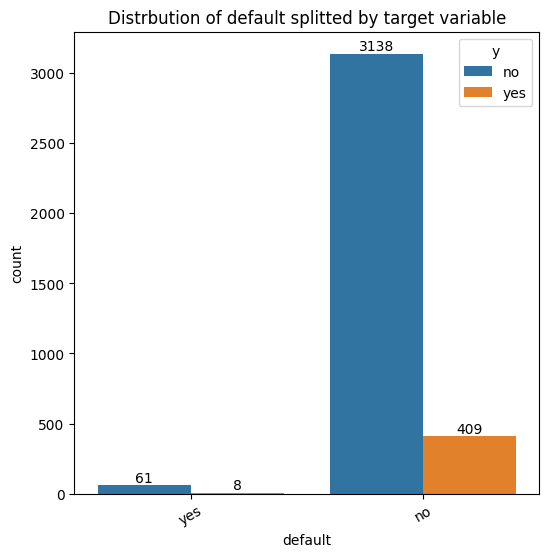

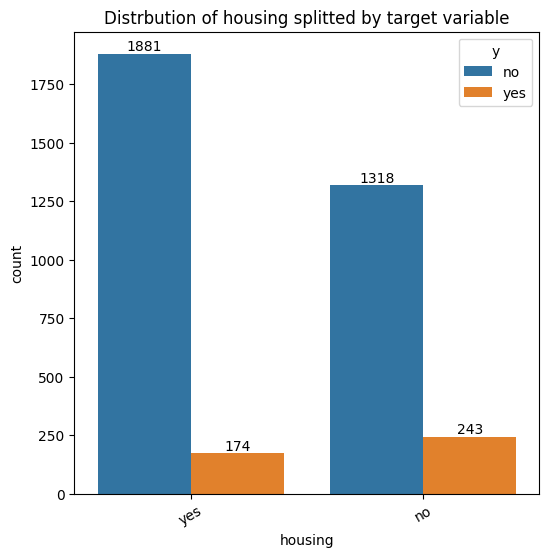

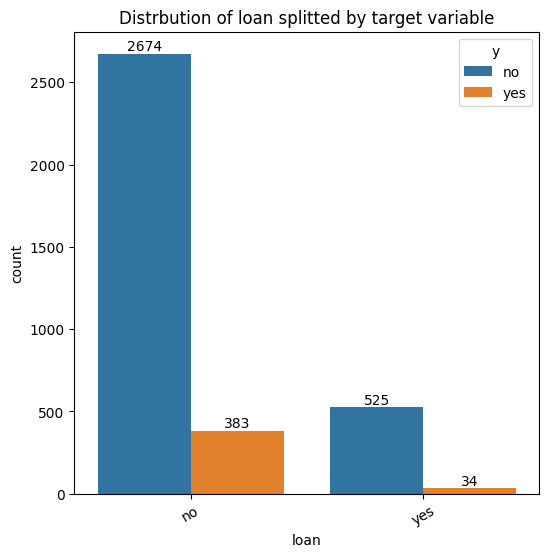

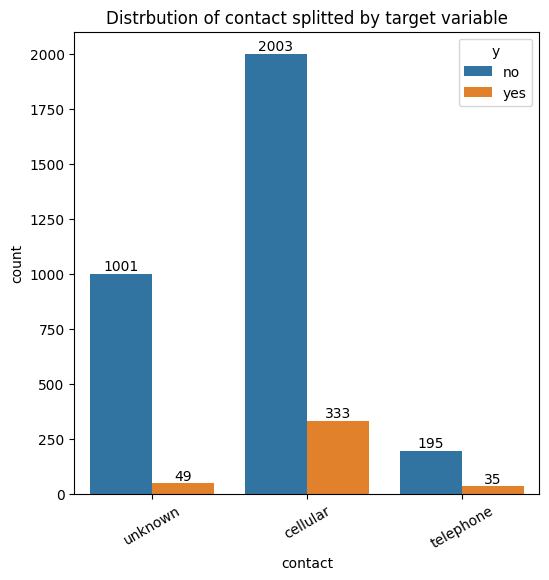

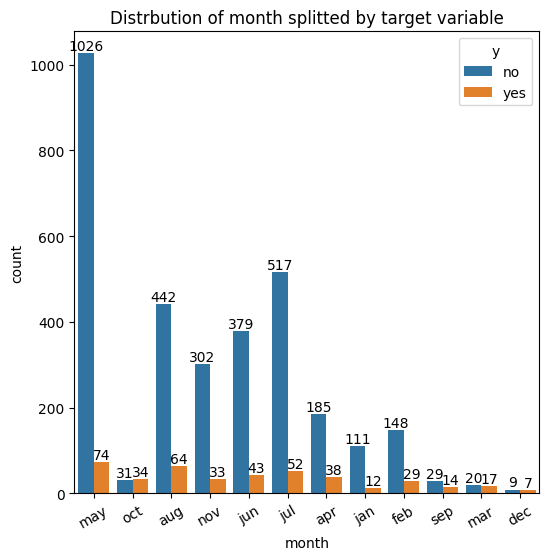

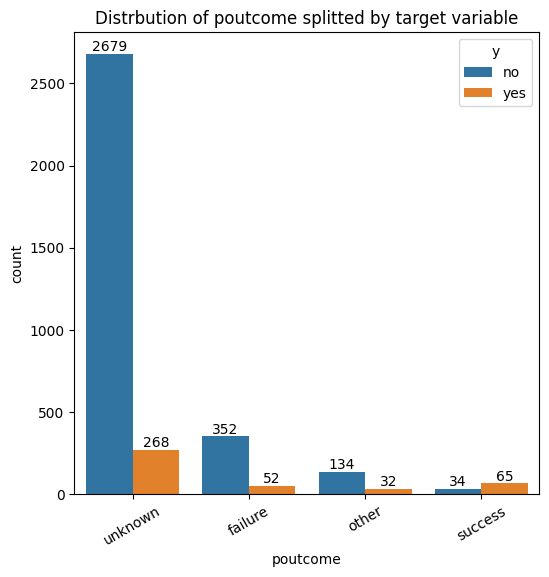

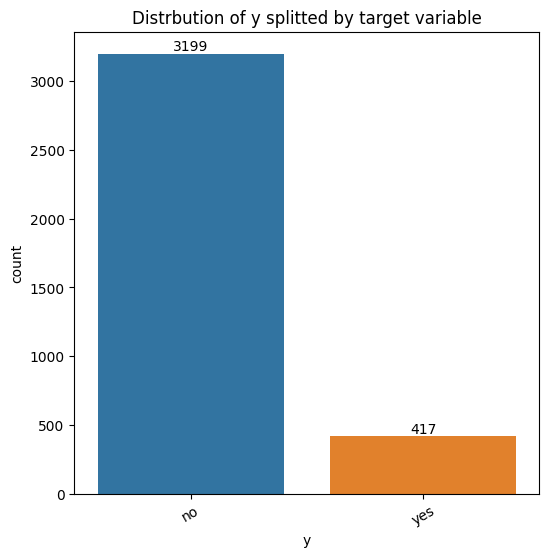

In [19]:
for col in cat_features:
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(data=df, x=col, hue='y')
    plt.xticks(rotation=30)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

##### Variables combinations

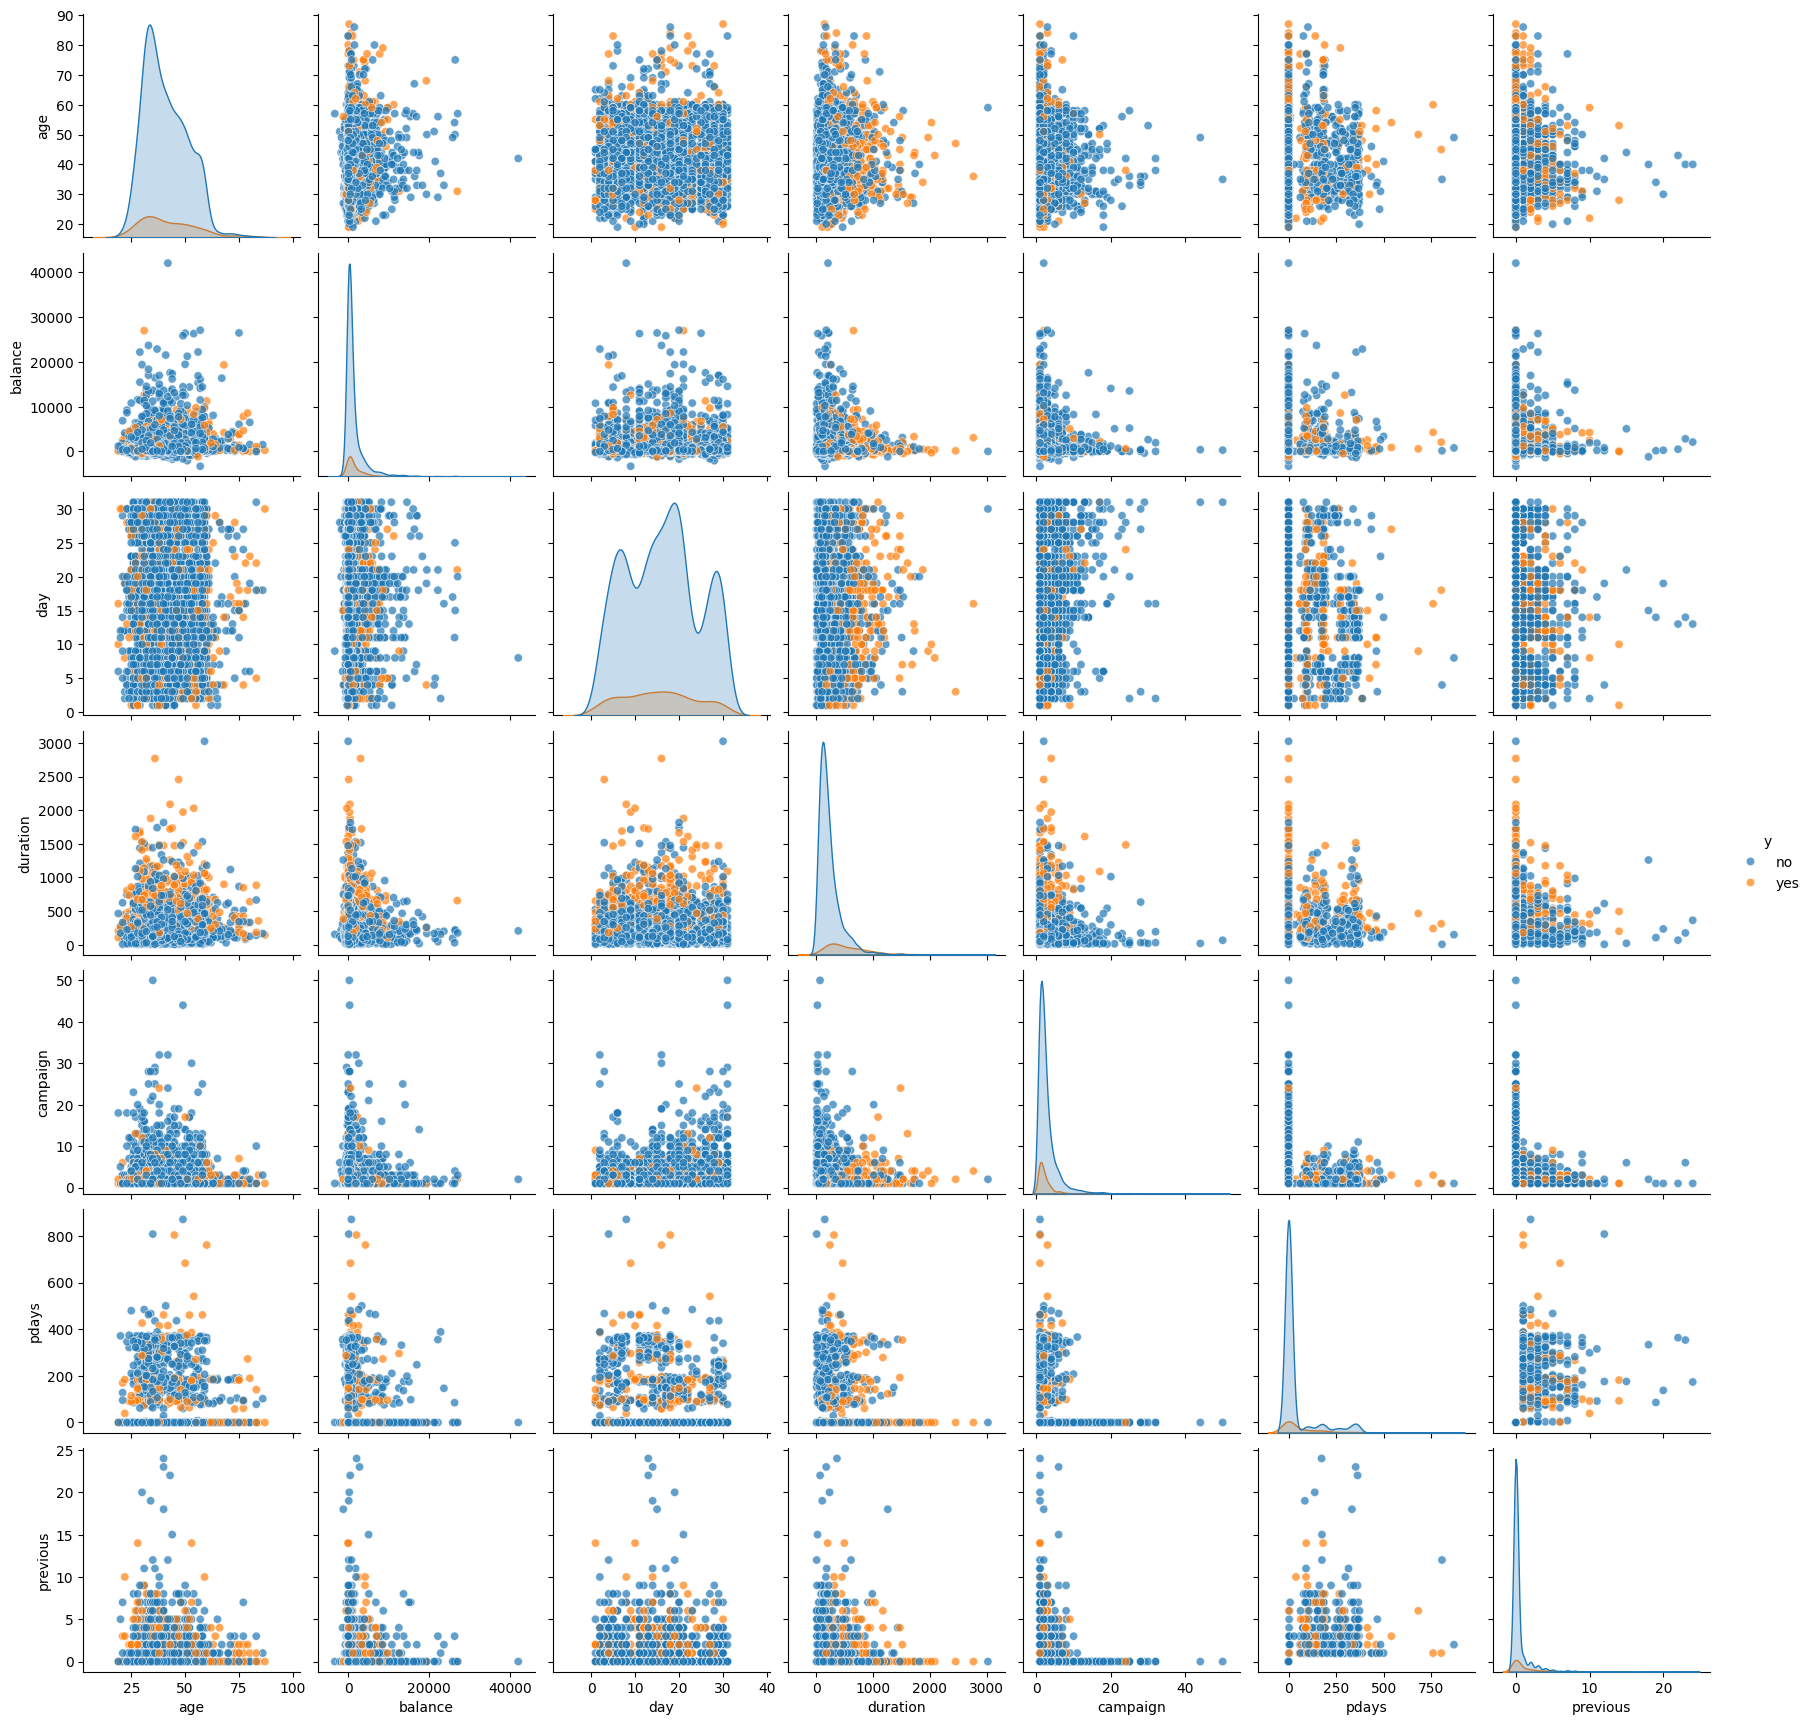

In [20]:
sns.pairplot(df, hue="y", plot_kws={'alpha':0.7})

 Let's look closer on age variable

y   age        no       yes     ratio
0    19  0.333333  0.666667  2.000000
1    20  0.666667  0.333333  0.500000
2    21  0.857143  0.142857  0.166667
3    22  0.625000  0.375000  0.600000
4    23  0.875000  0.125000  0.142857
..  ...       ...       ...       ...
60   80  0.666667  0.333333  0.500000
61   83  0.500000  0.500000  1.000000
62   84  0.000000  1.000000  5.000000
63   86  1.000000  0.000000  0.000000
64   87  0.000000  1.000000  5.000000

[65 rows x 4 columns]

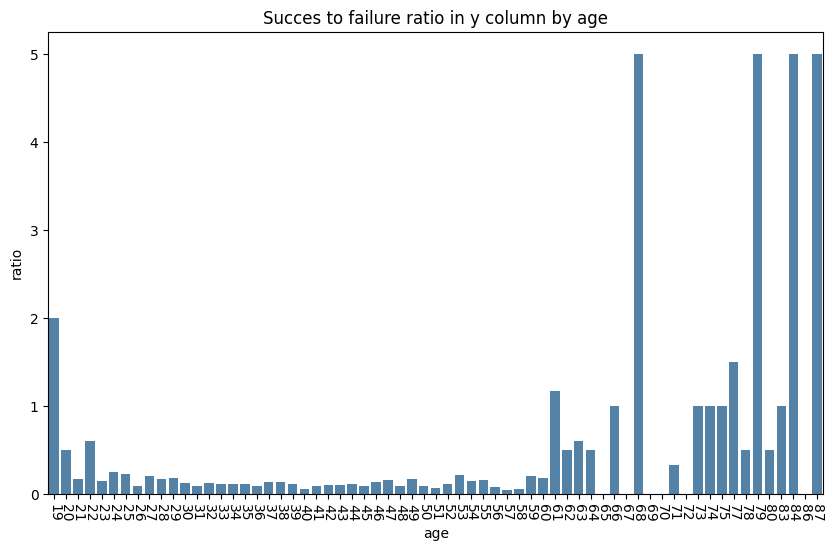

In [21]:
result = df.groupby('age')['y'].value_counts(normalize=True).unstack().fillna(0).reset_index().replace({'inf':10})
result['ratio'] = result['yes'] / result['no']
result['ratio'] = result['ratio'].replace([np.inf, -np.inf], 5)  # as for ration euqal to inf 
                                                                # values dont appear on 
                                                                # a plot we replace them with 5
                                                                # which is greater than 
                                                                # other ratios
plt.figure(figsize=(10, 6))
sns.barplot(result, x='age', y ='ratio', color="steelblue")
plt.xticks(rotation=-90)
plt.title("Succes to failure ratio in y column by age")
result

In [22]:
df.loc[df["y"] == 'yes'][['age', 'y']].groupby('age').count().reset_index(names='age')
df.loc[df["y"] == 'no'][['age', 'y']].groupby('age').count().reset_index(names='age')


age   y
0    19   1
1    20   2
2    21   6
3    22   5
4    23  14
..  ...  ..
56   77   2
57   78   2
58   80   2
59   83   2
60   86   1

[61 rows x 2 columns]

<Axes: xlabel='age', ylabel='Count'>

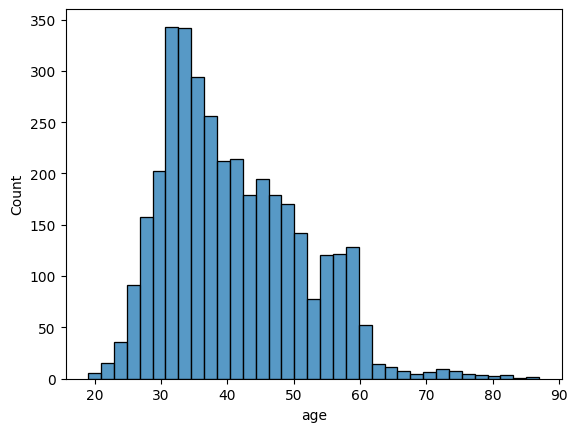

In [23]:
# calculate percentage of succes in age groups
sns.histplot(df['age'])


##### Duplicates

In [24]:
df.duplicated().sum()

0

## Observations
- Higher probability of success among individuals with whom we have succeeded in previous campaigns.;
- Noticeably higher likelihood of success among those without a housing loan;
- The longer the conversation lasts, the more successes we observe;
- Chances of success are much greater among people above 60

# Data transformations - first approach

In [25]:
exp_featreus = ['balance', 'duration', 'campaign', 'pdays', 'previous']

In [26]:
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
sns.set_theme()

def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


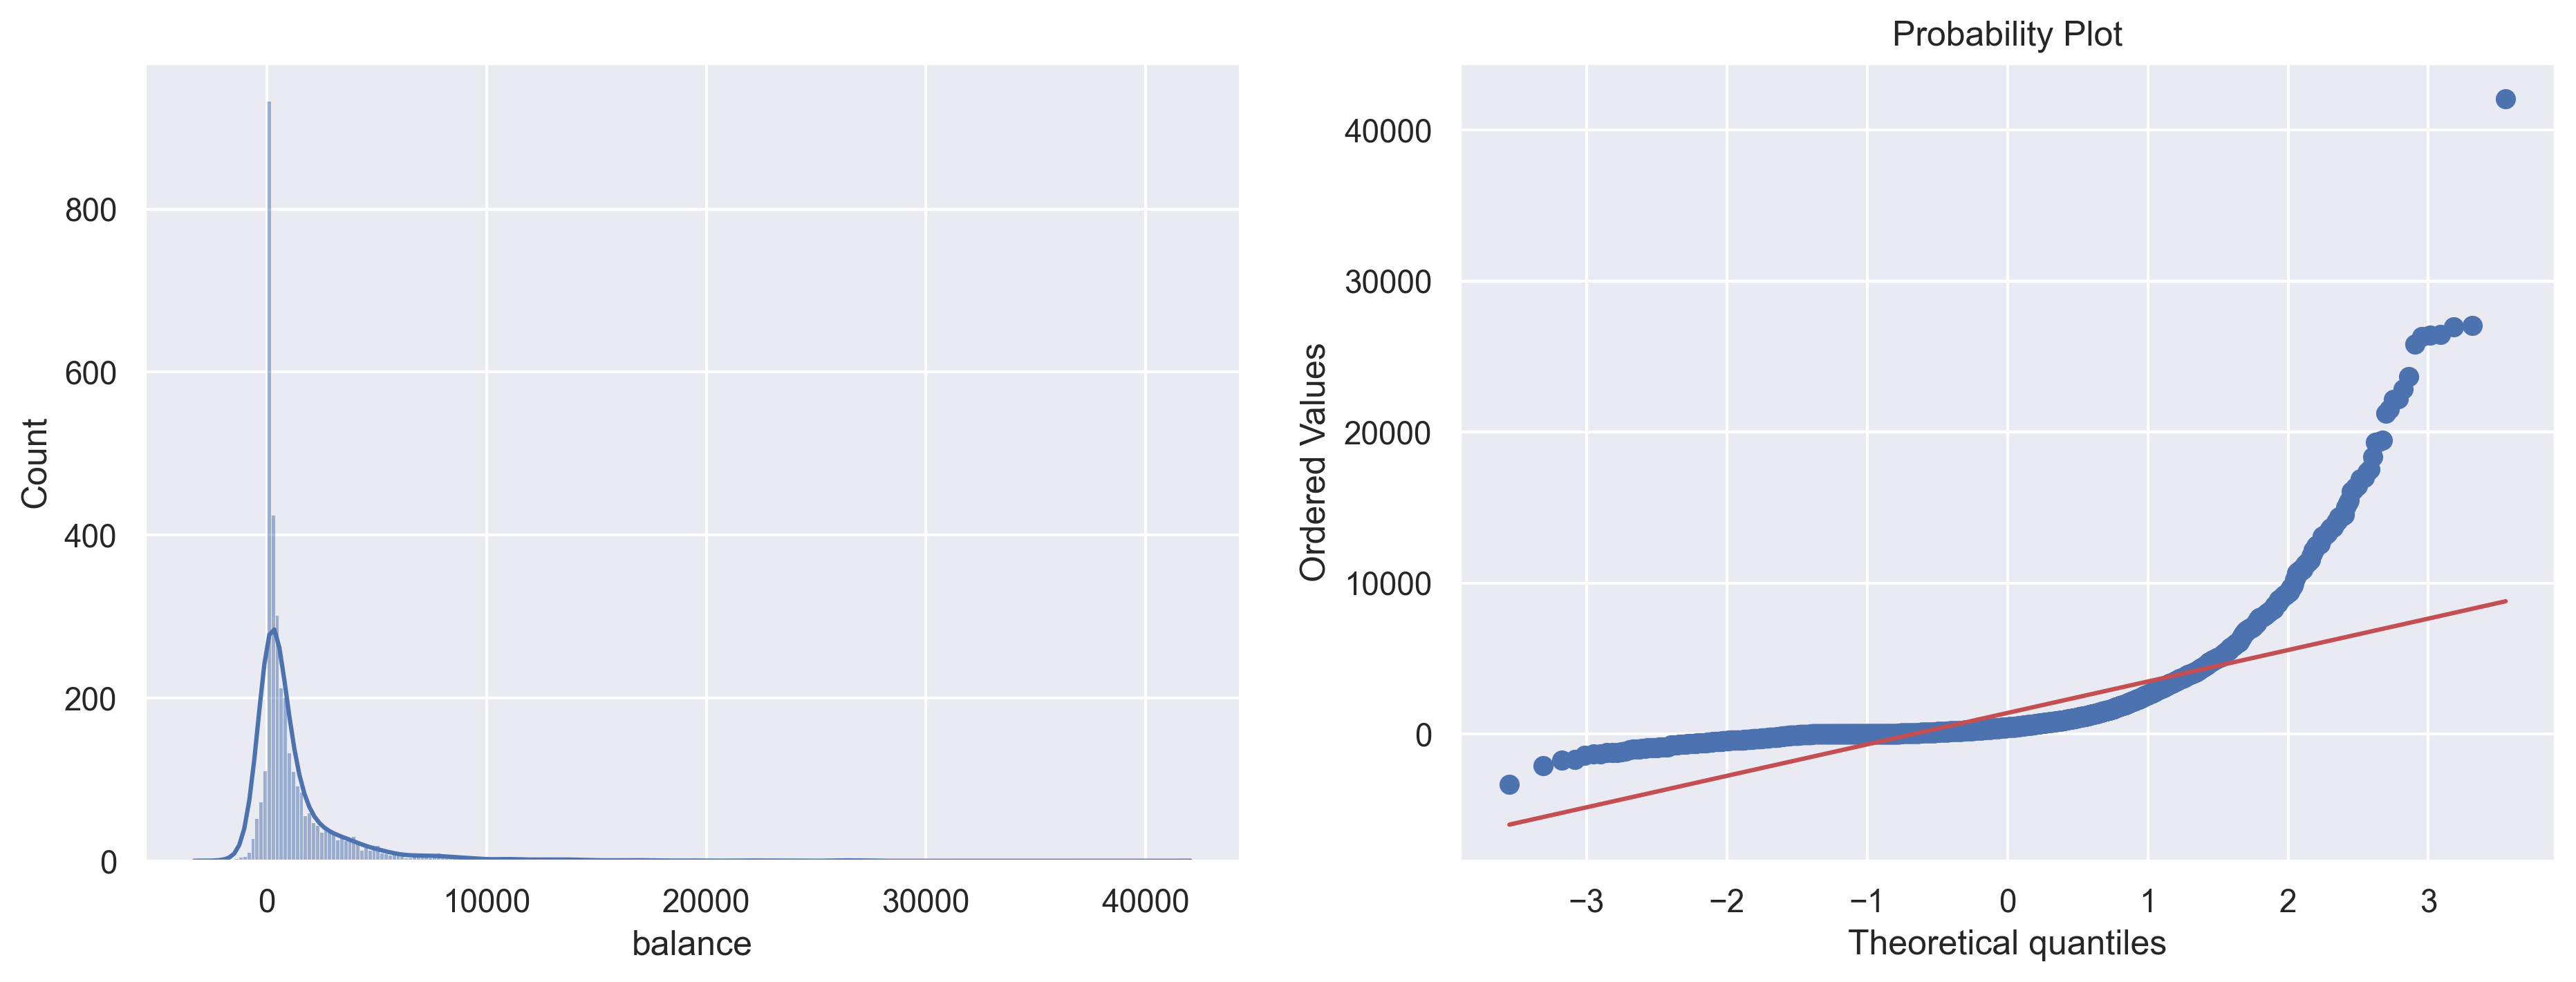

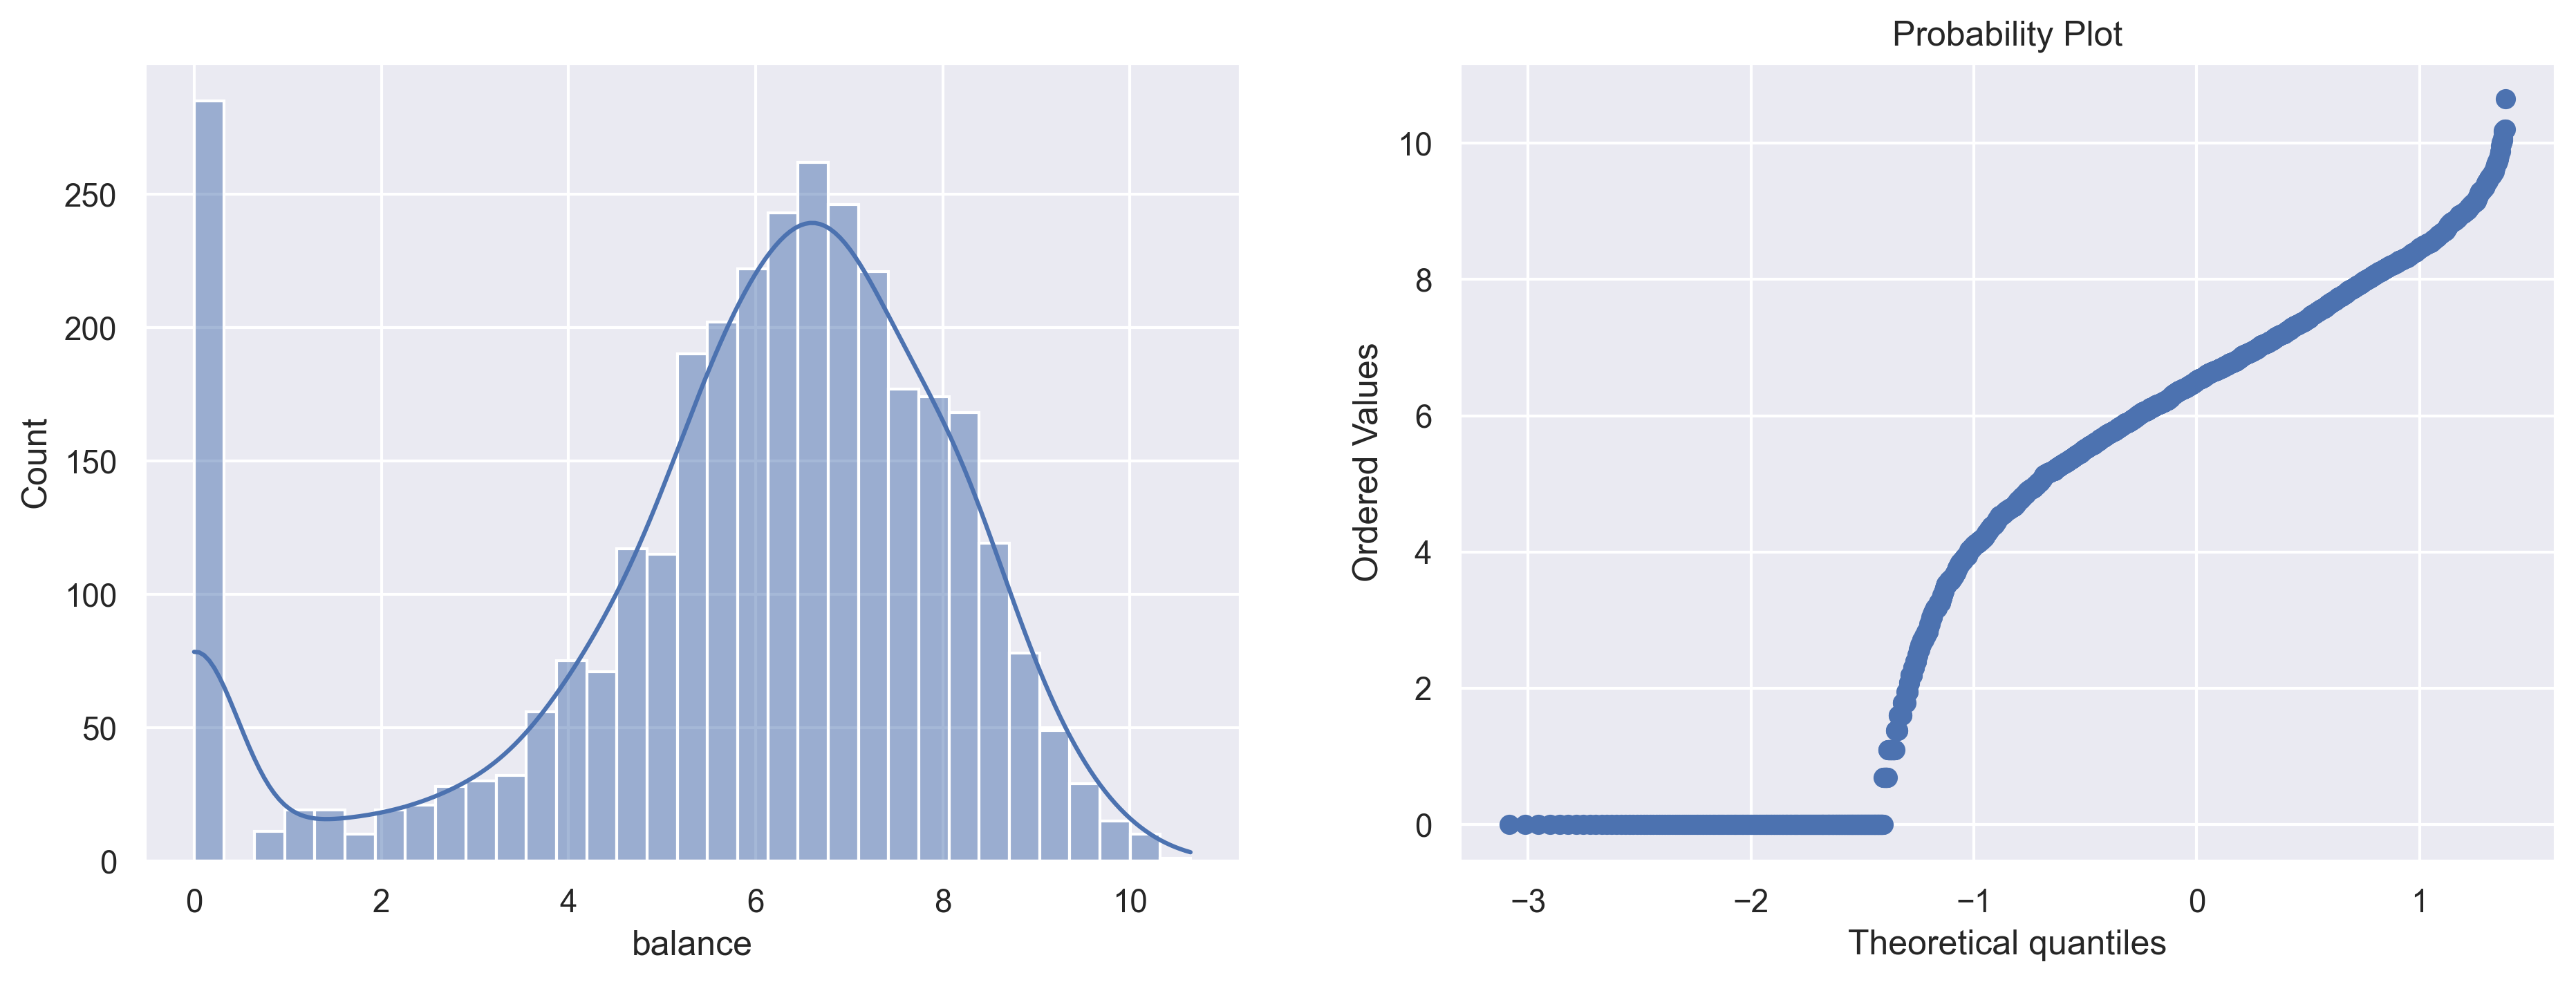

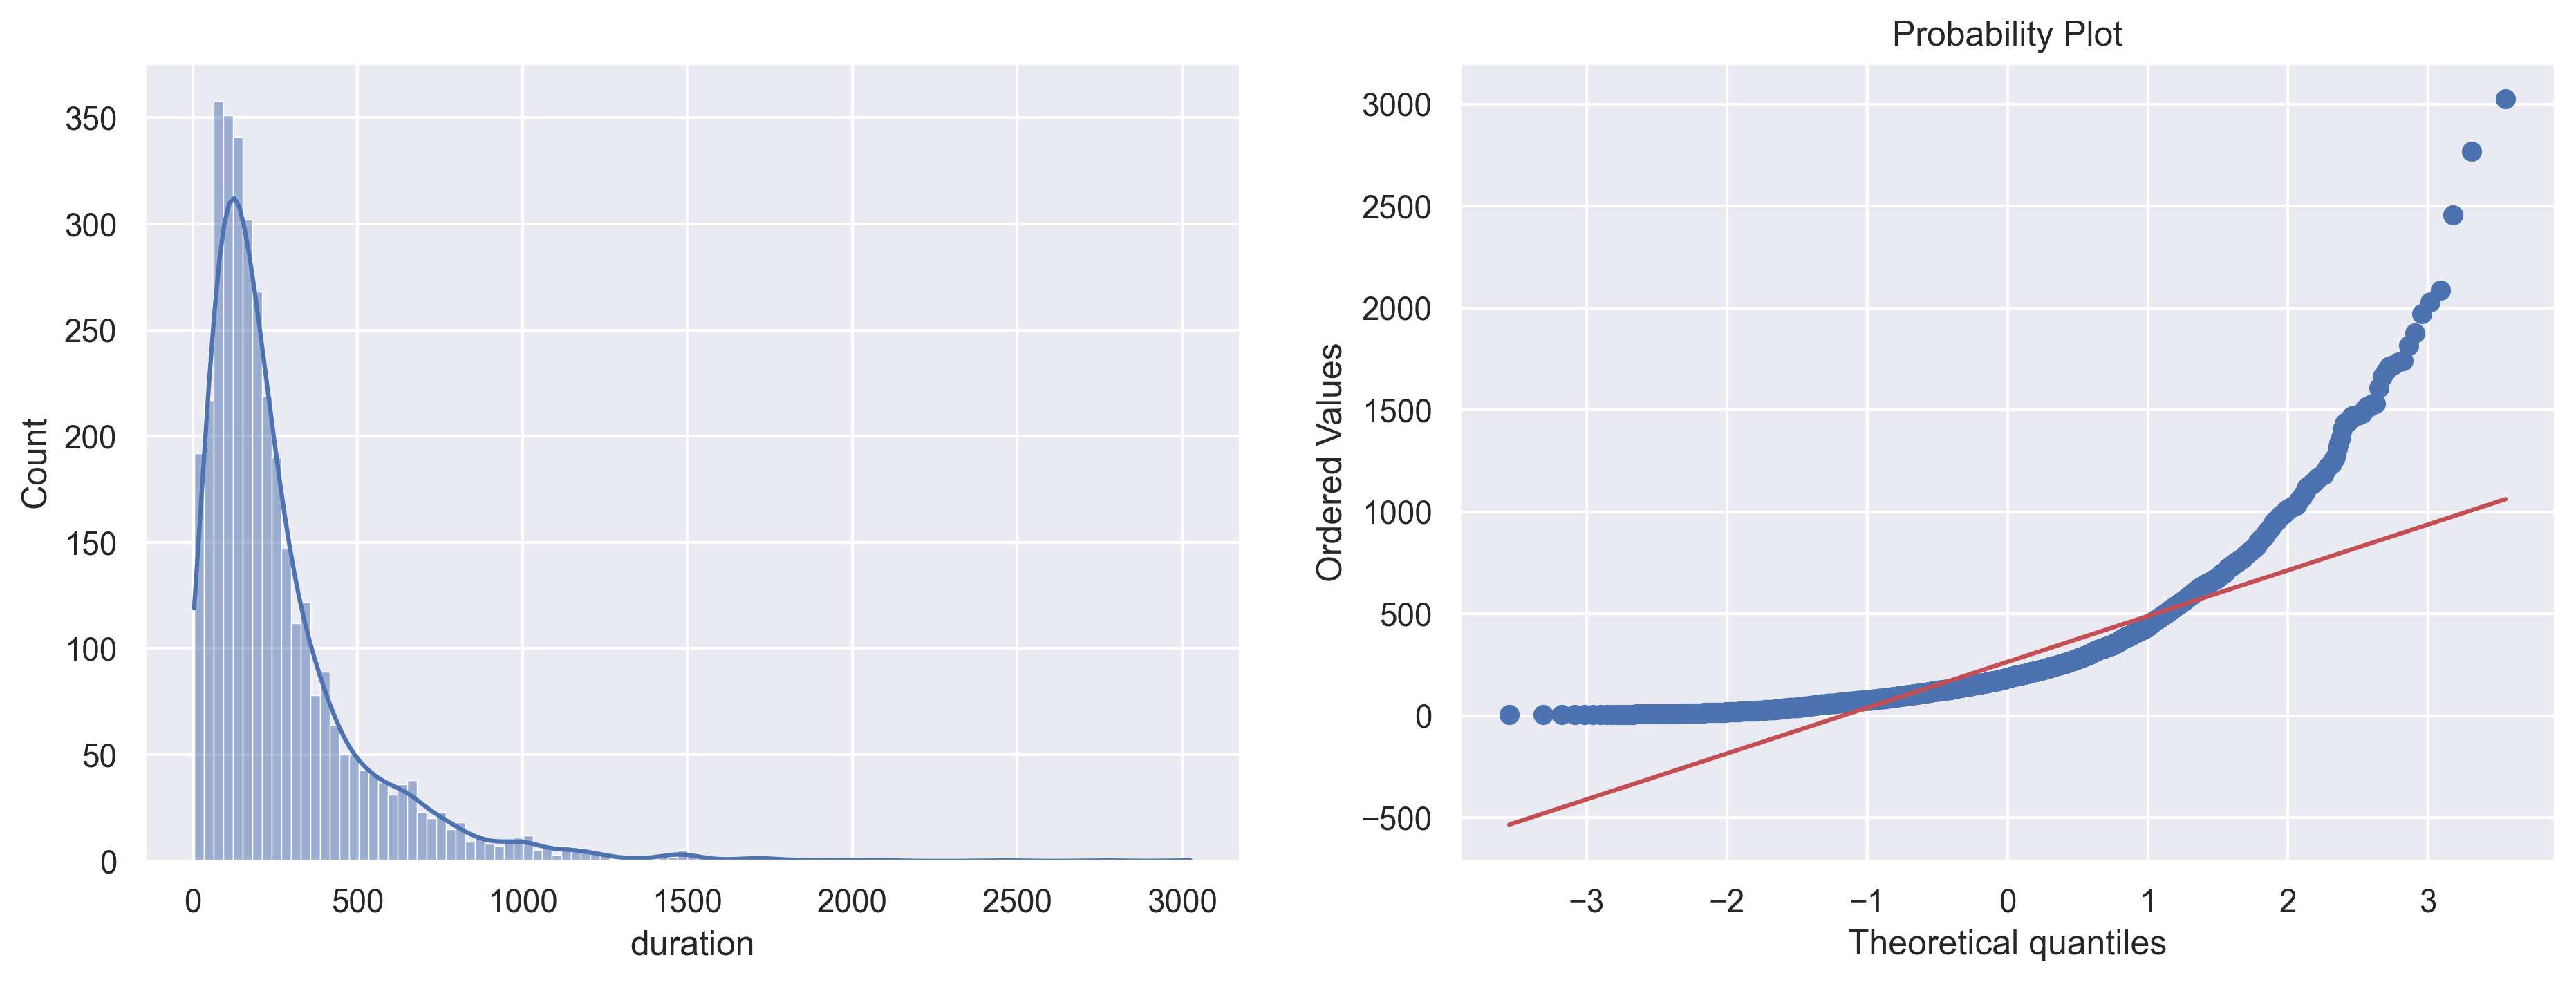

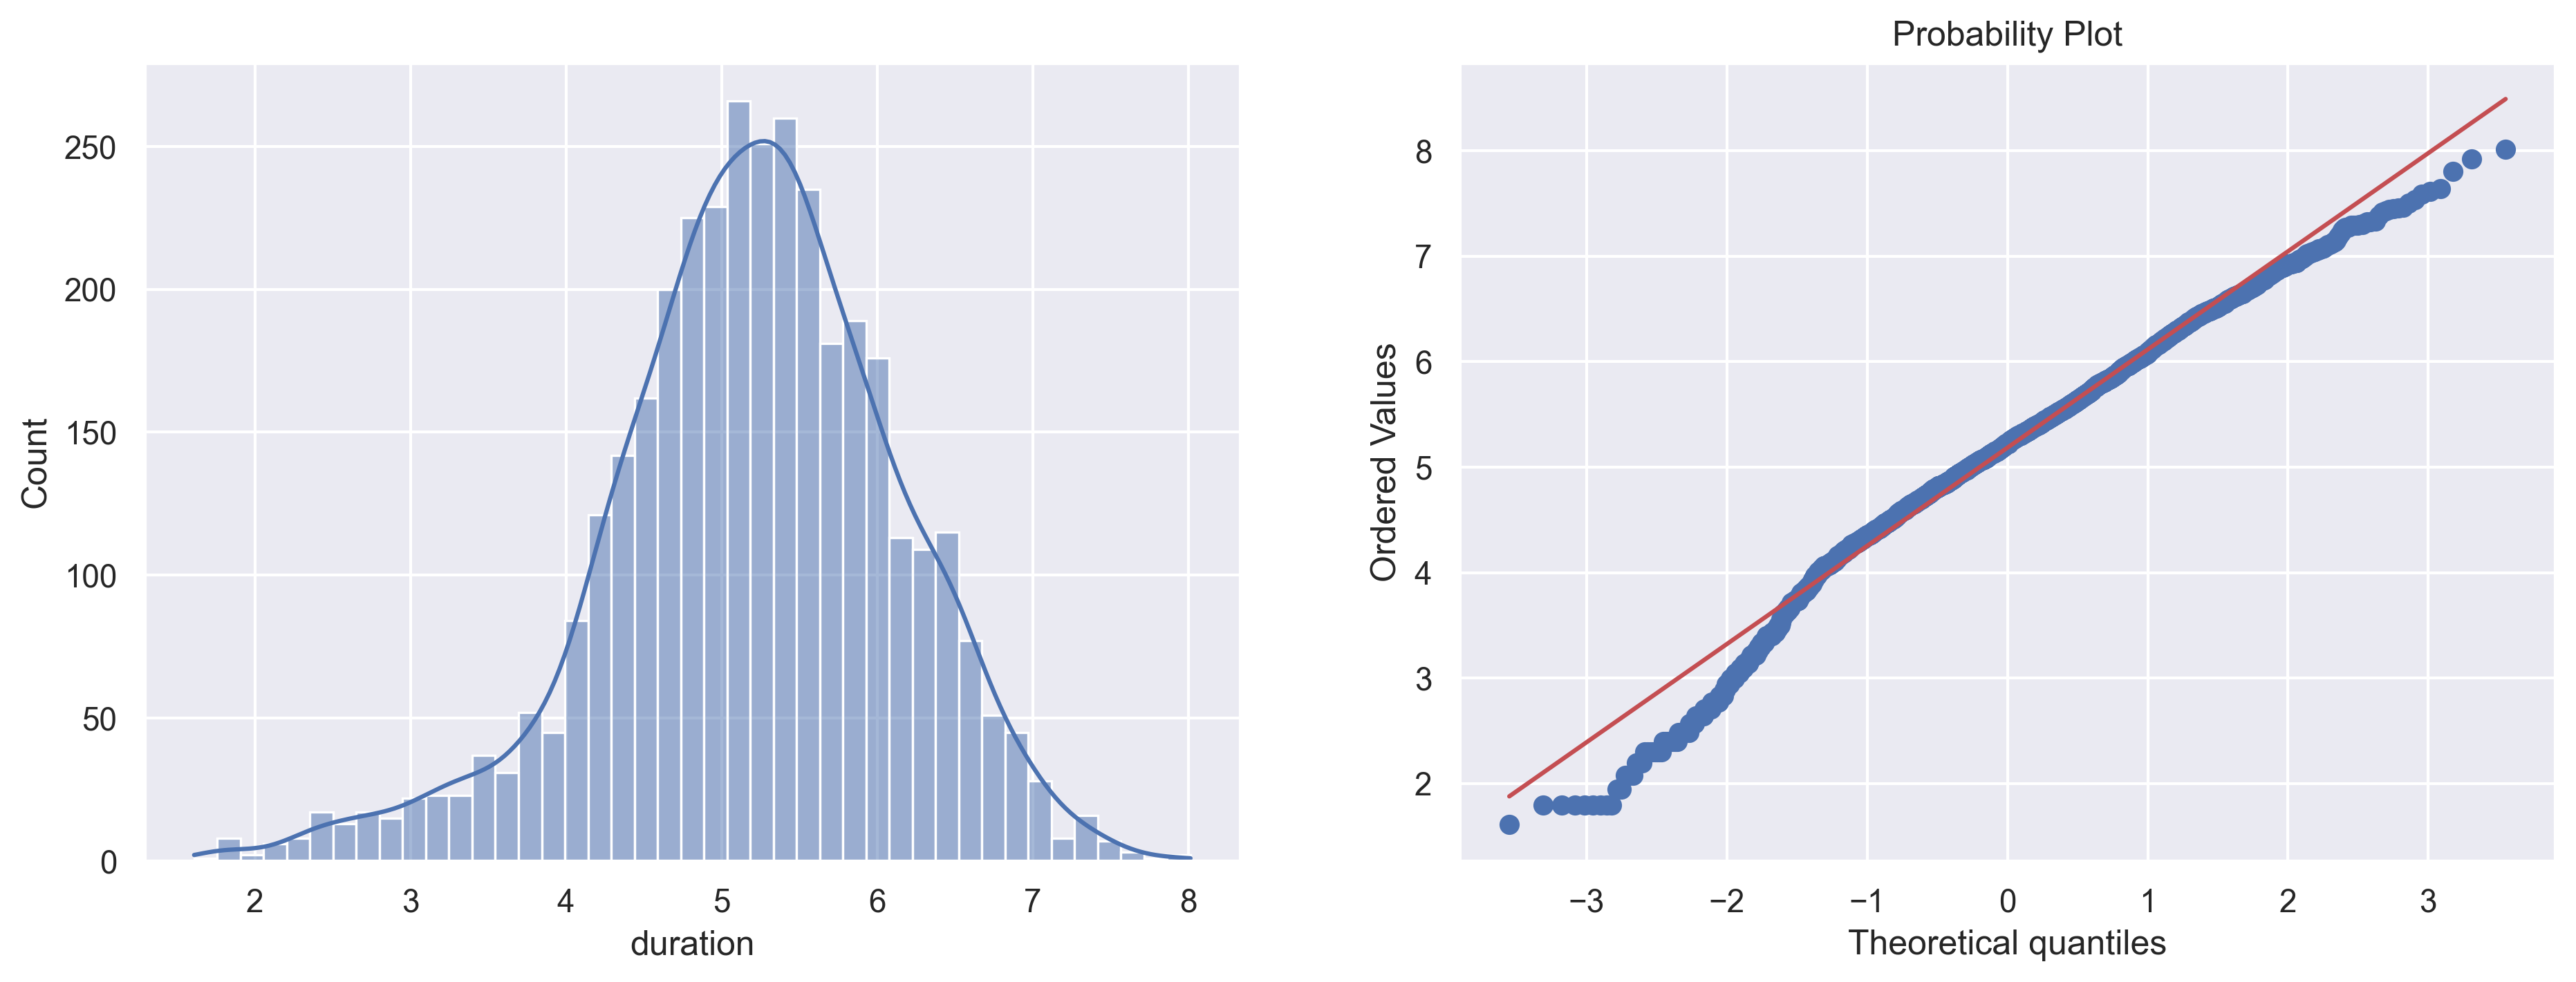

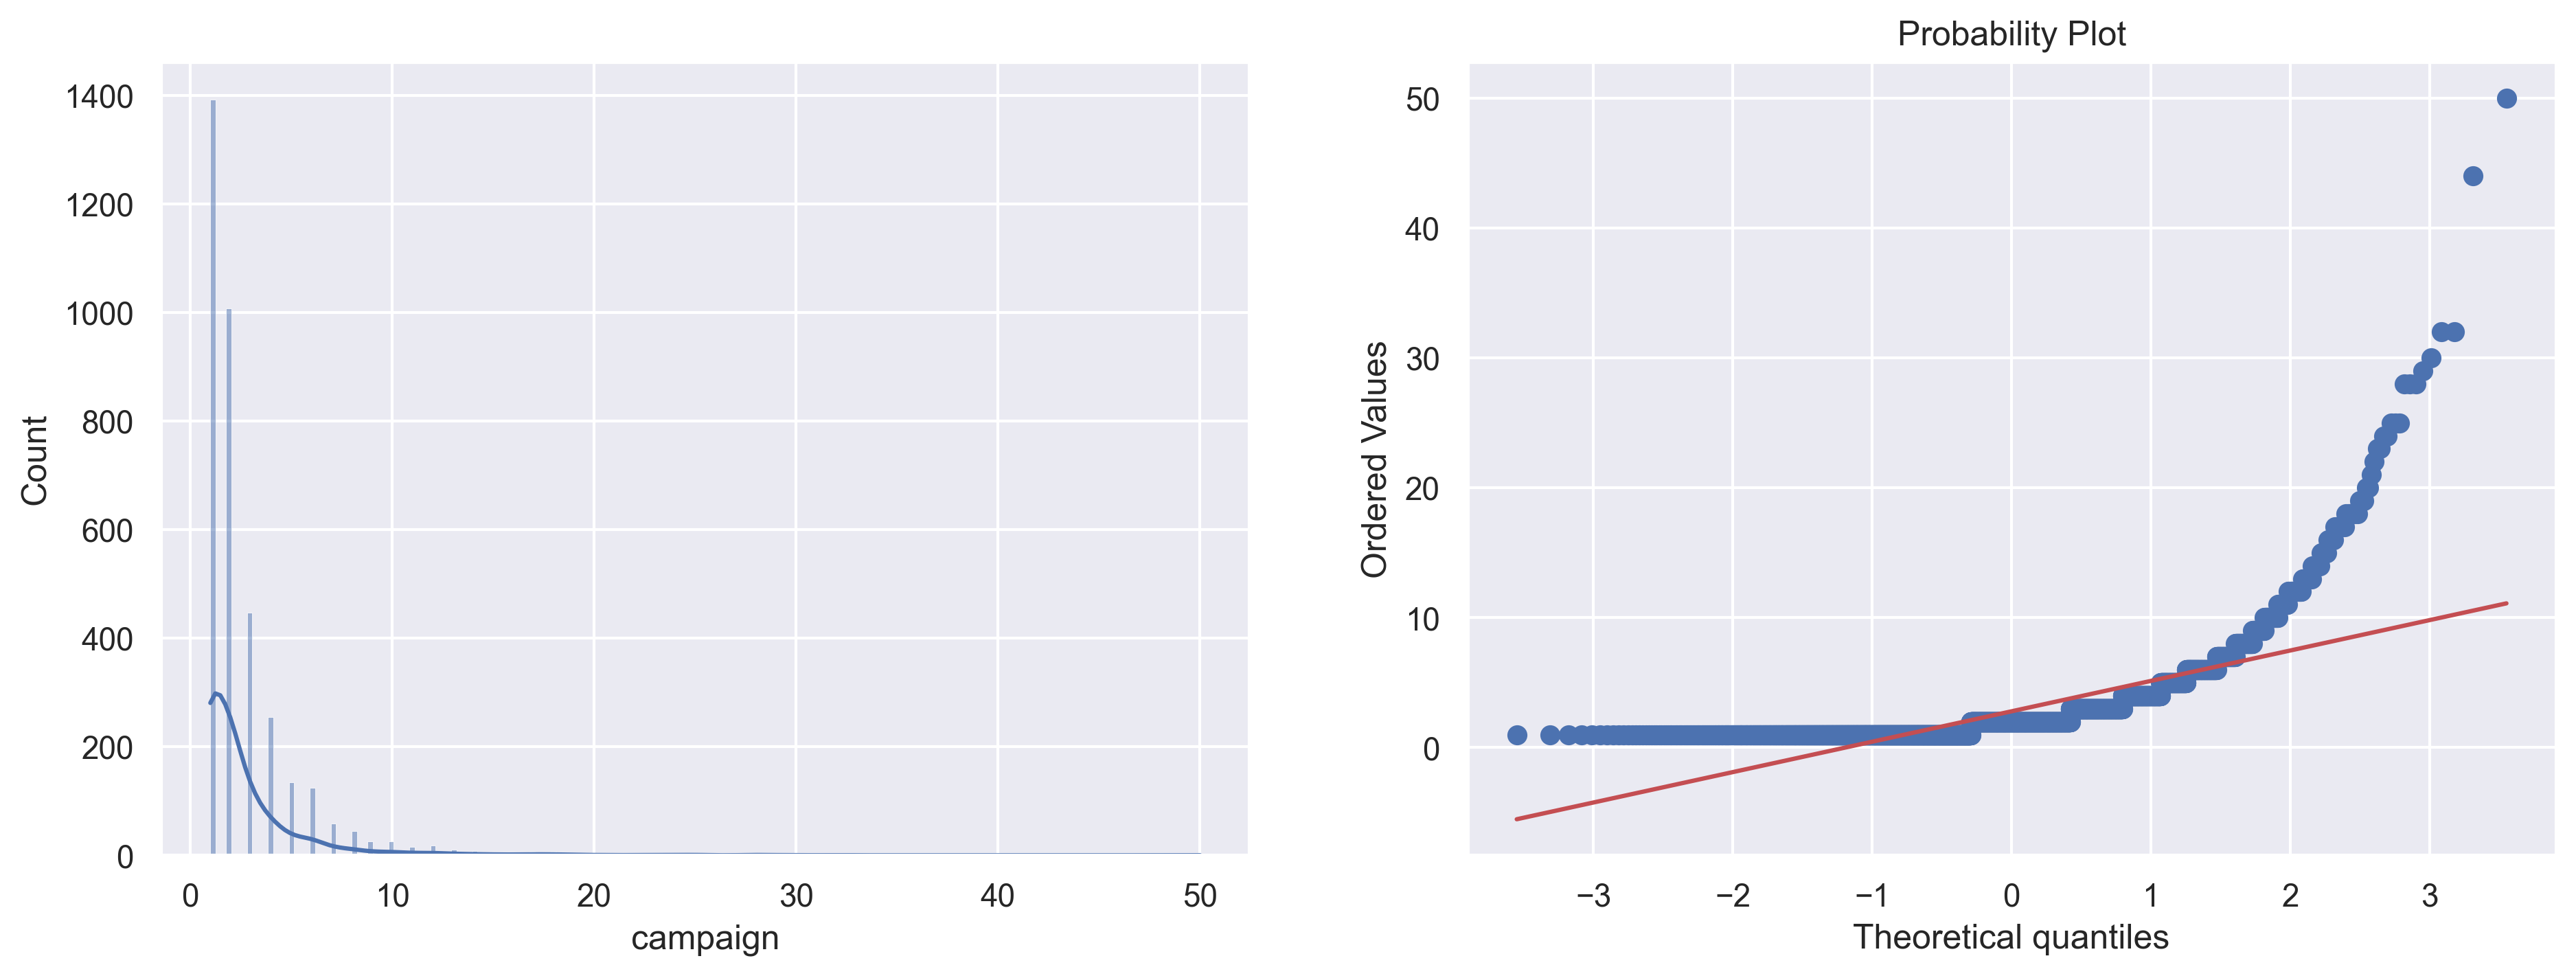

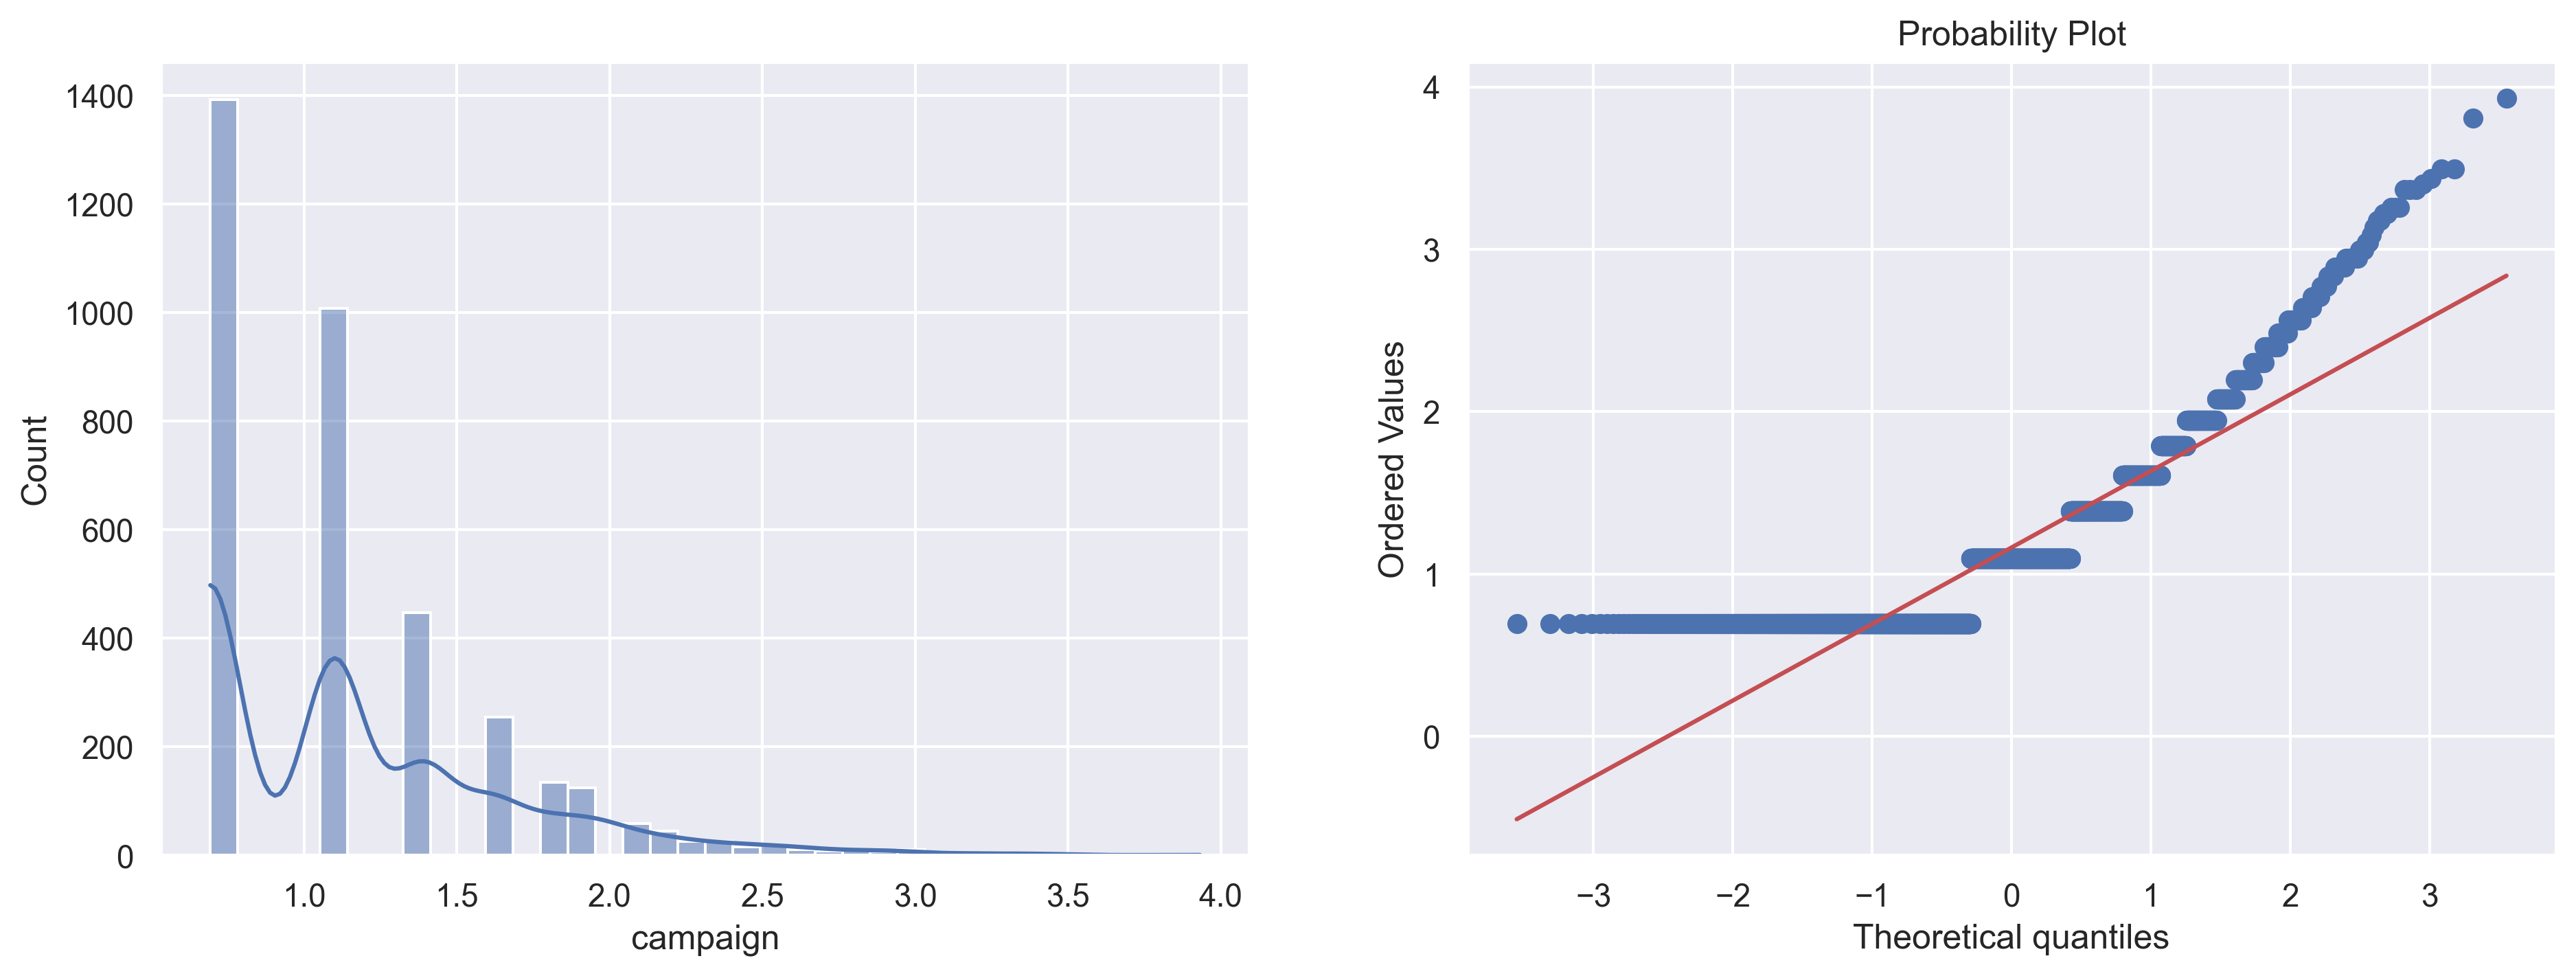

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


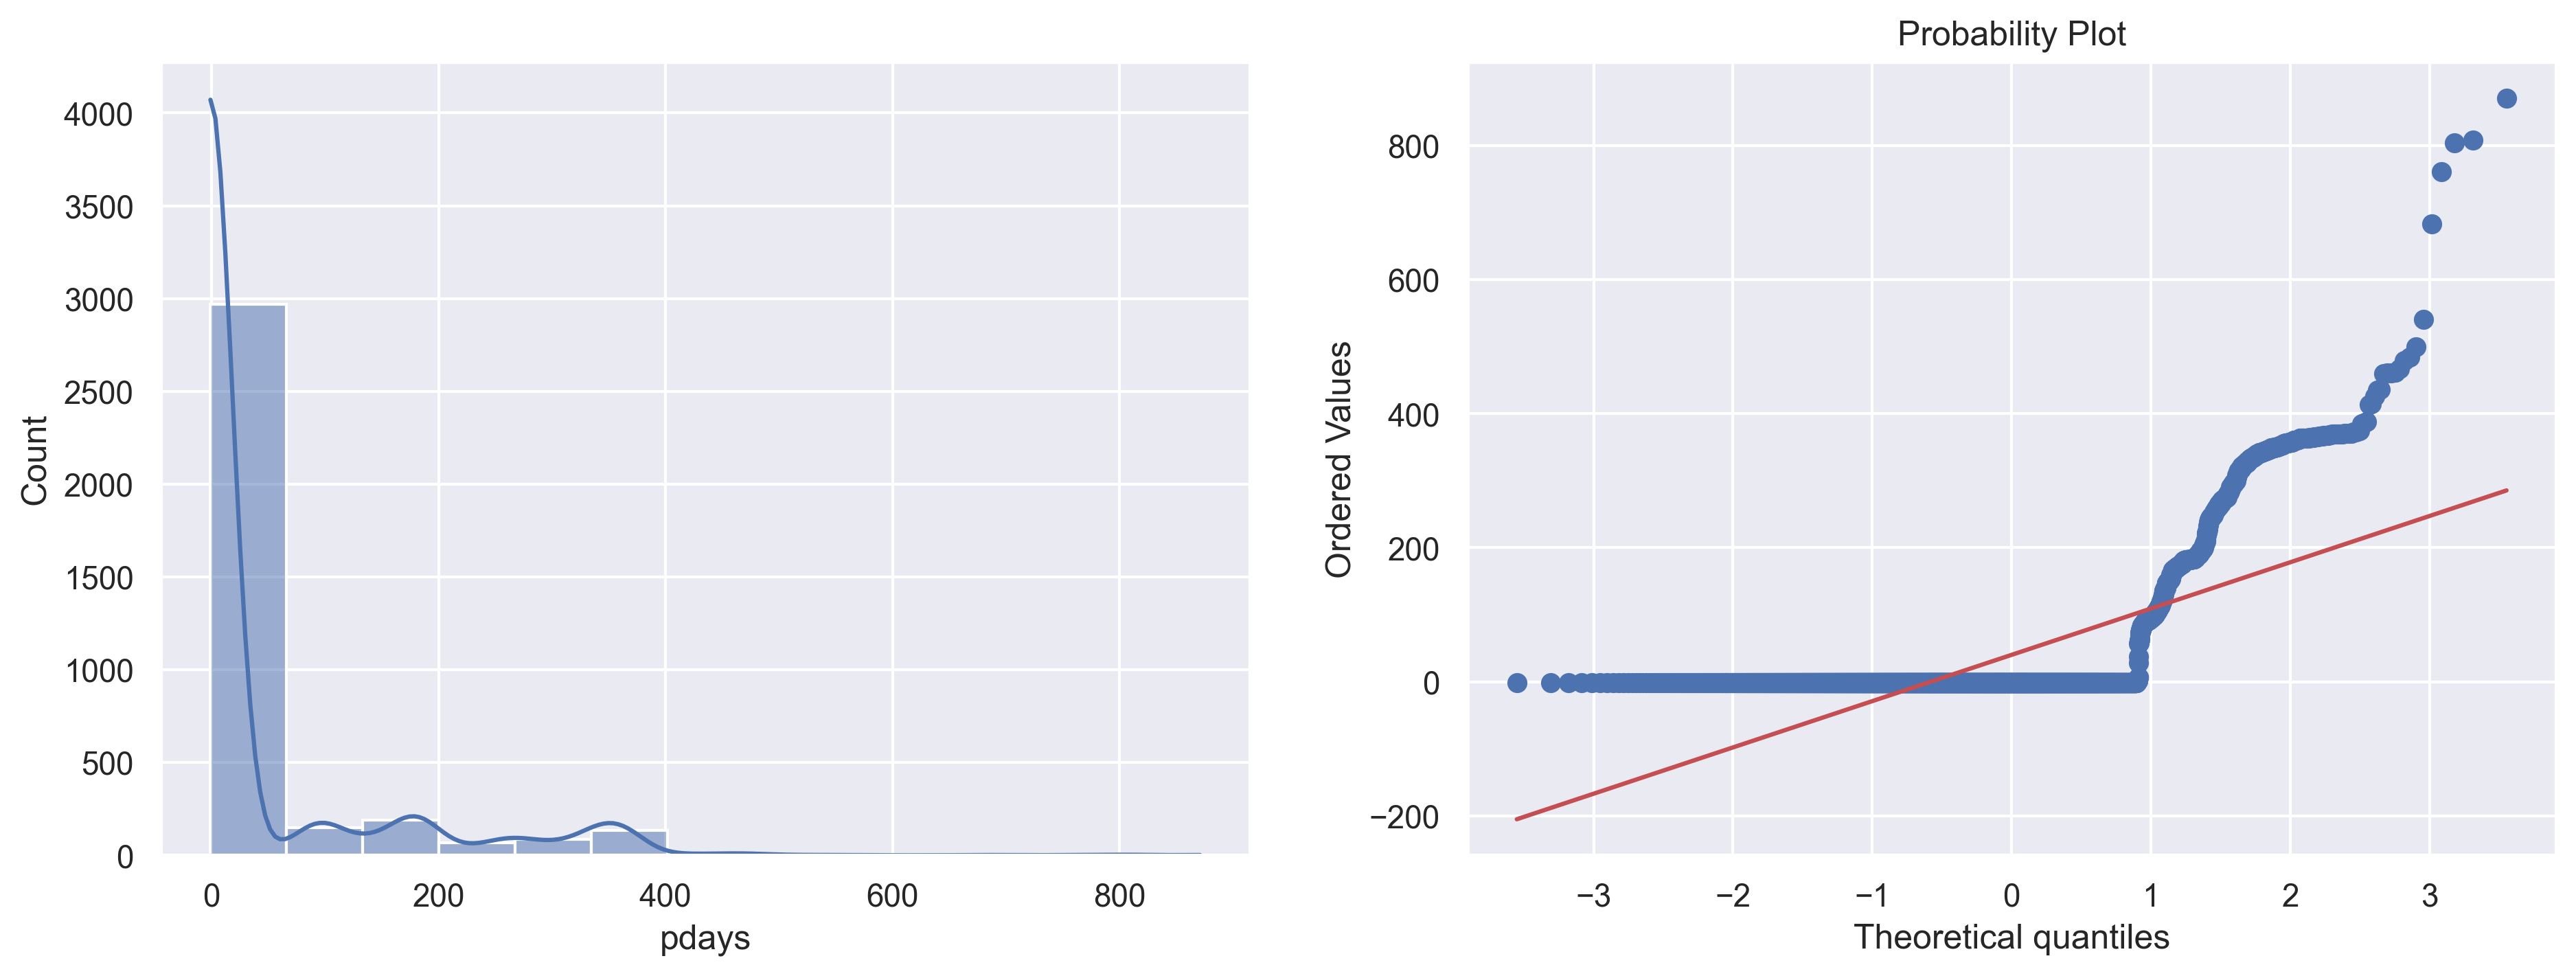

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


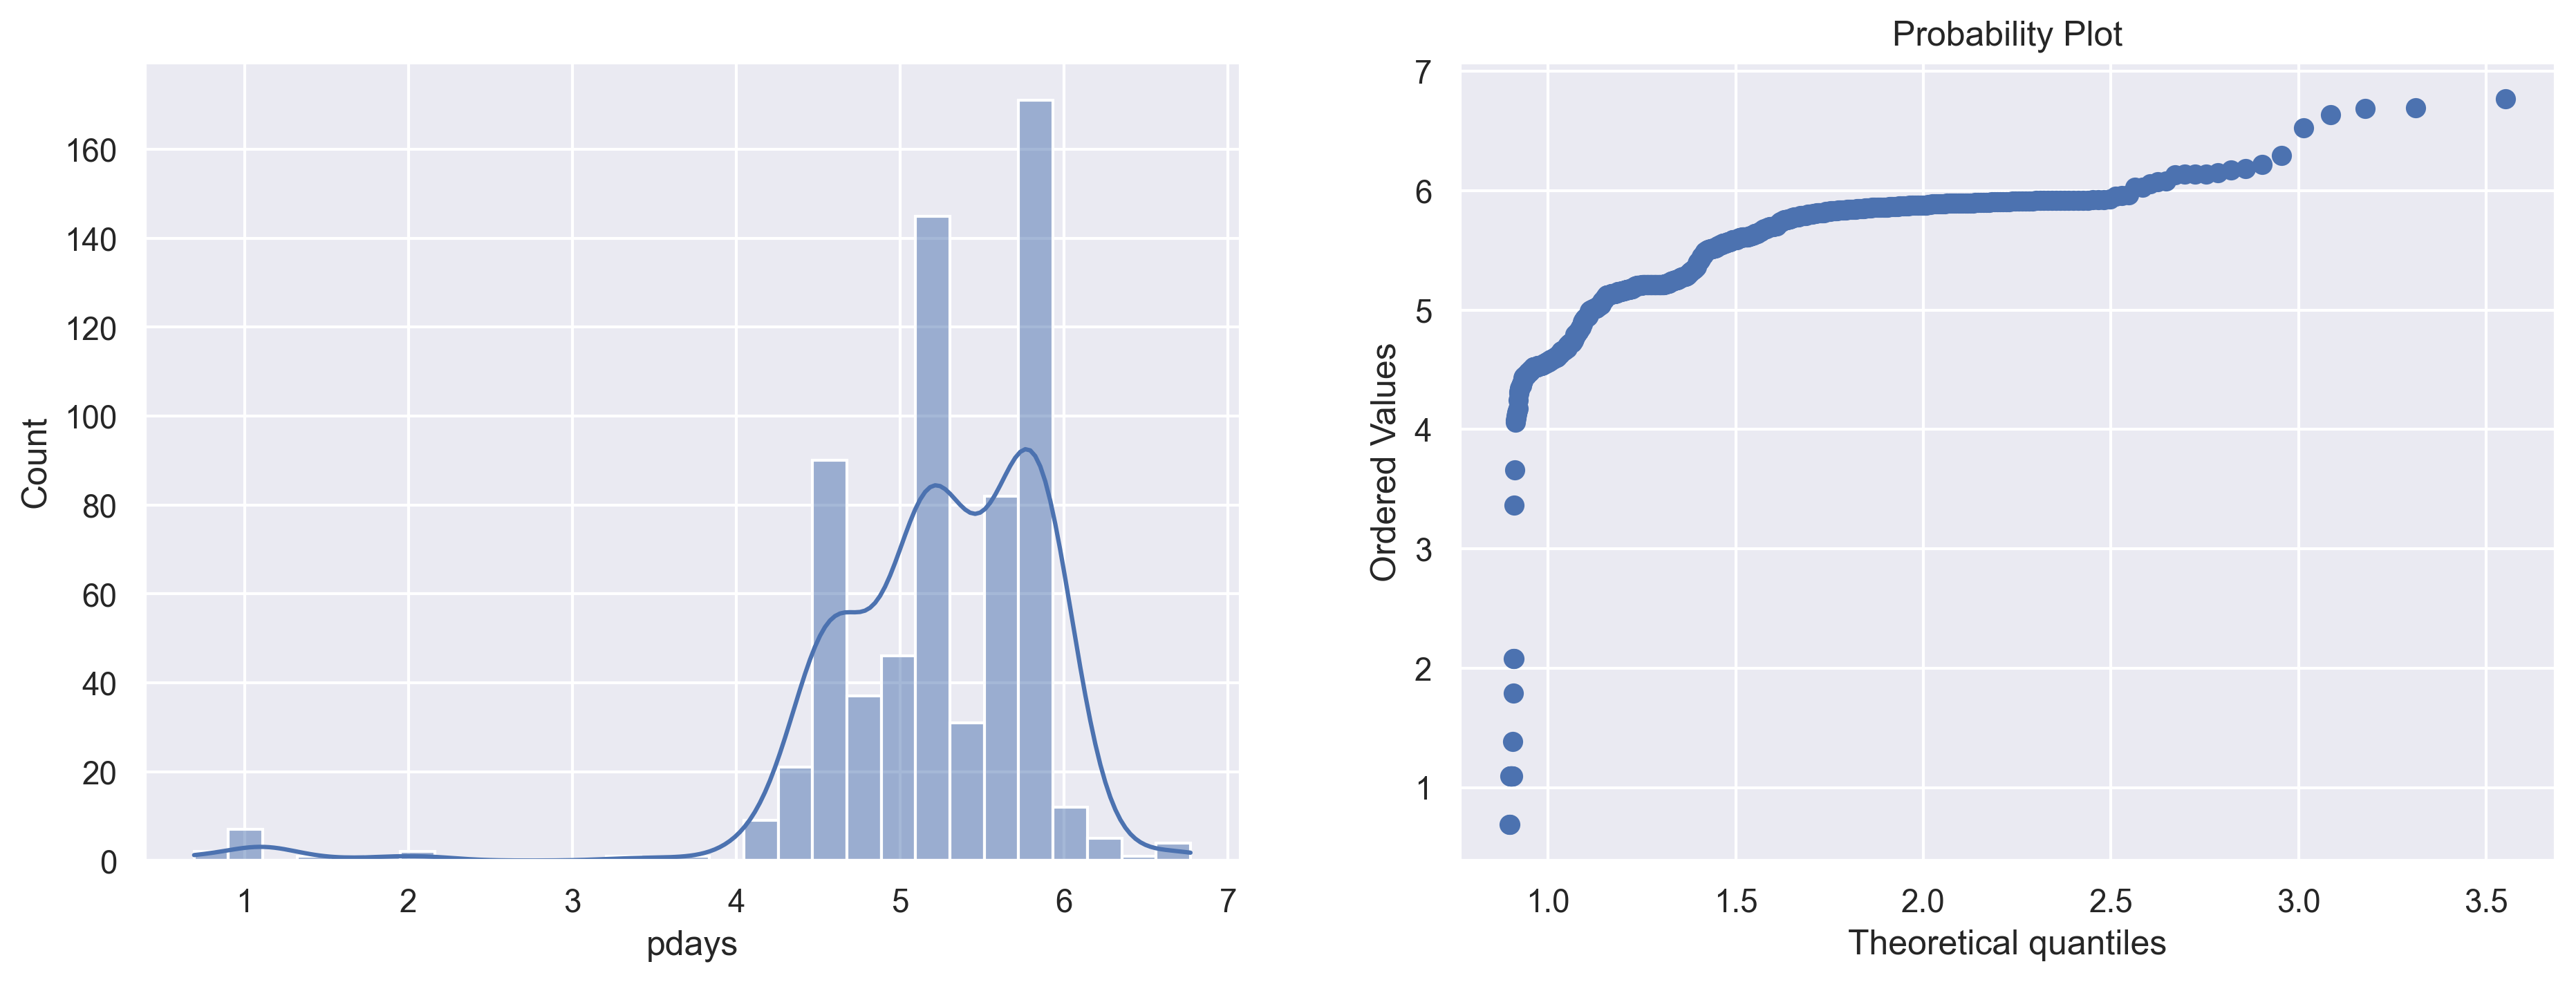

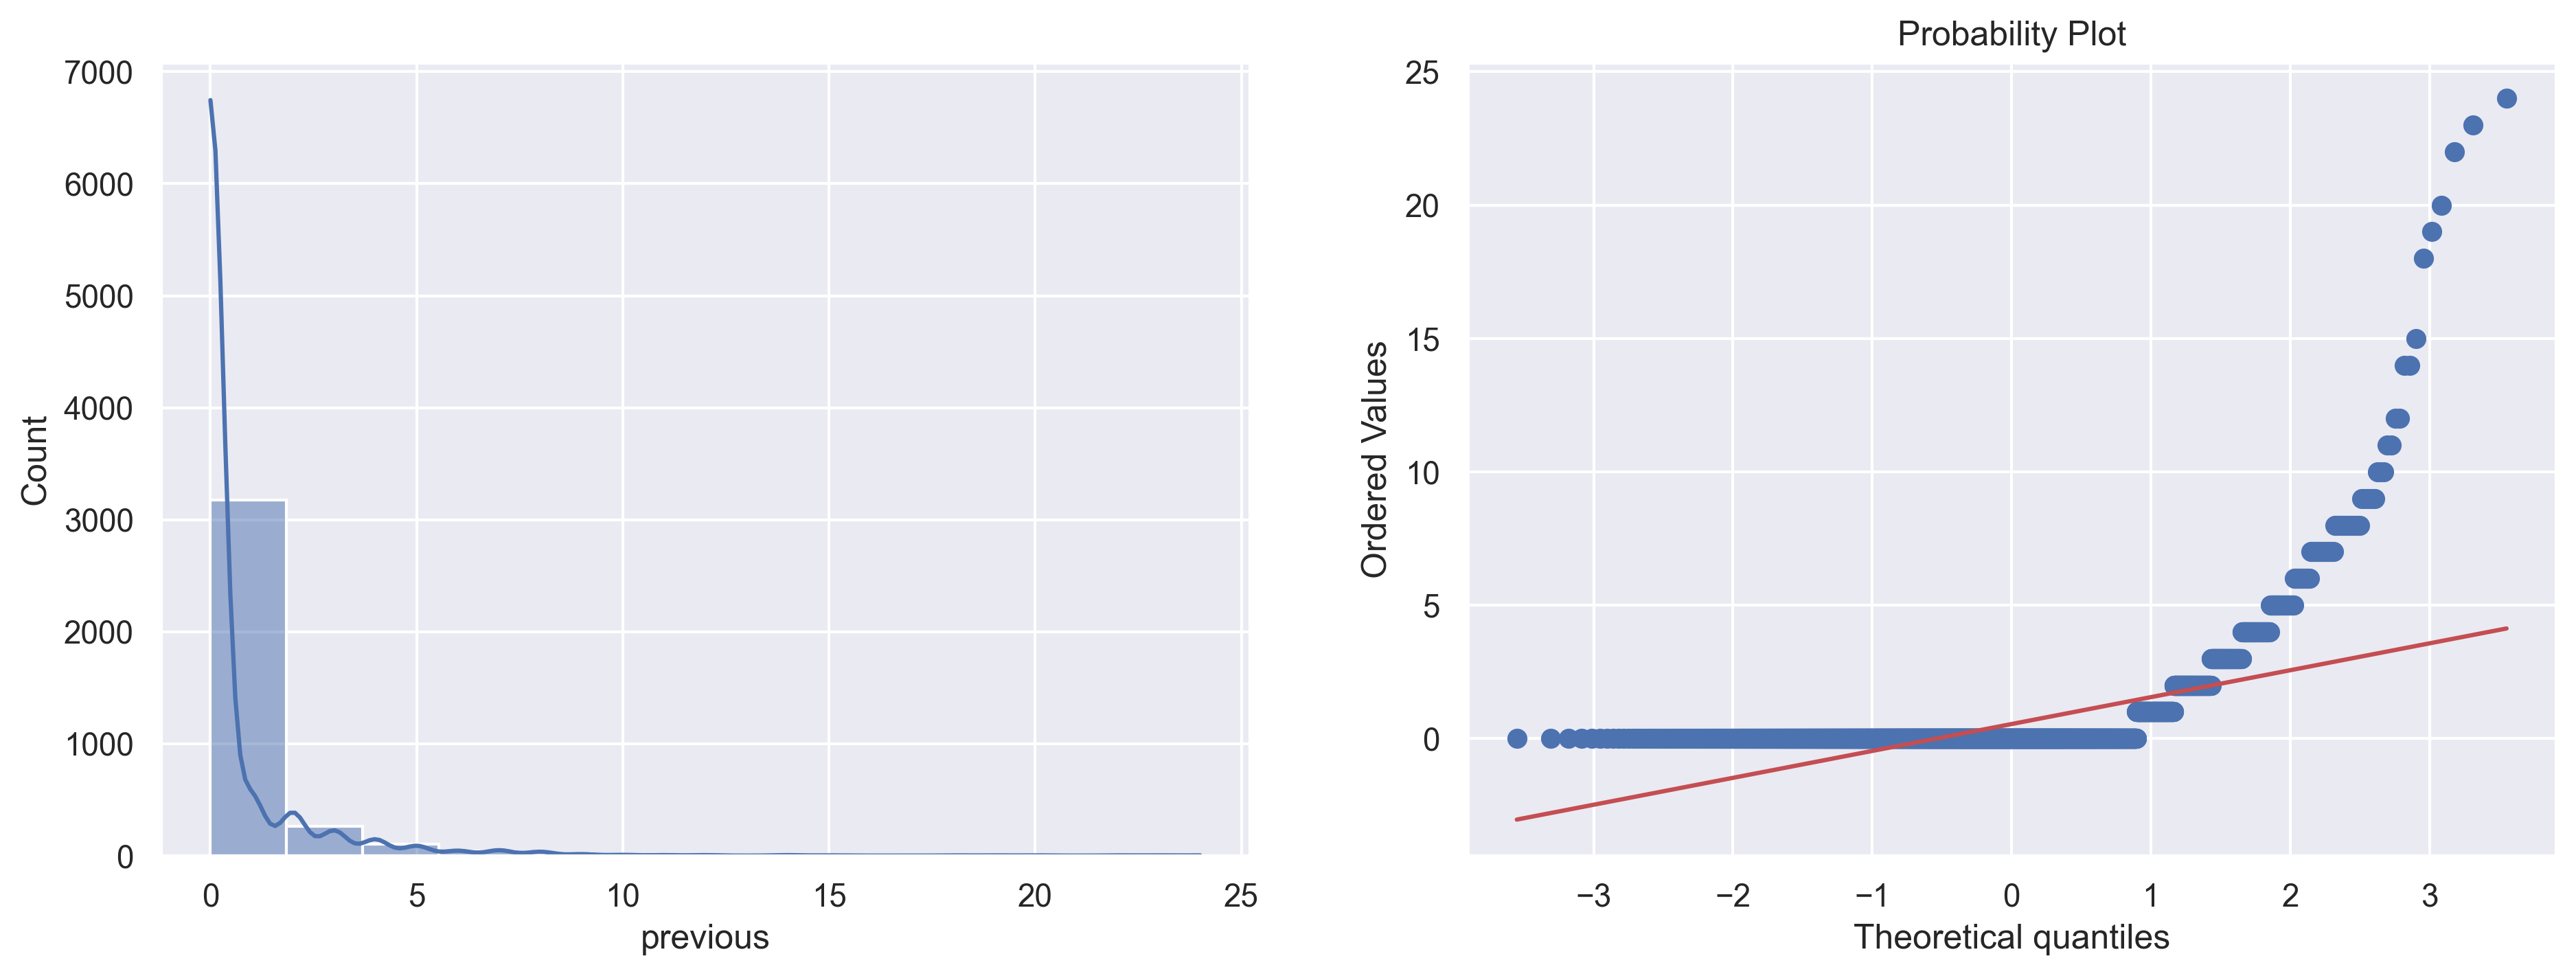

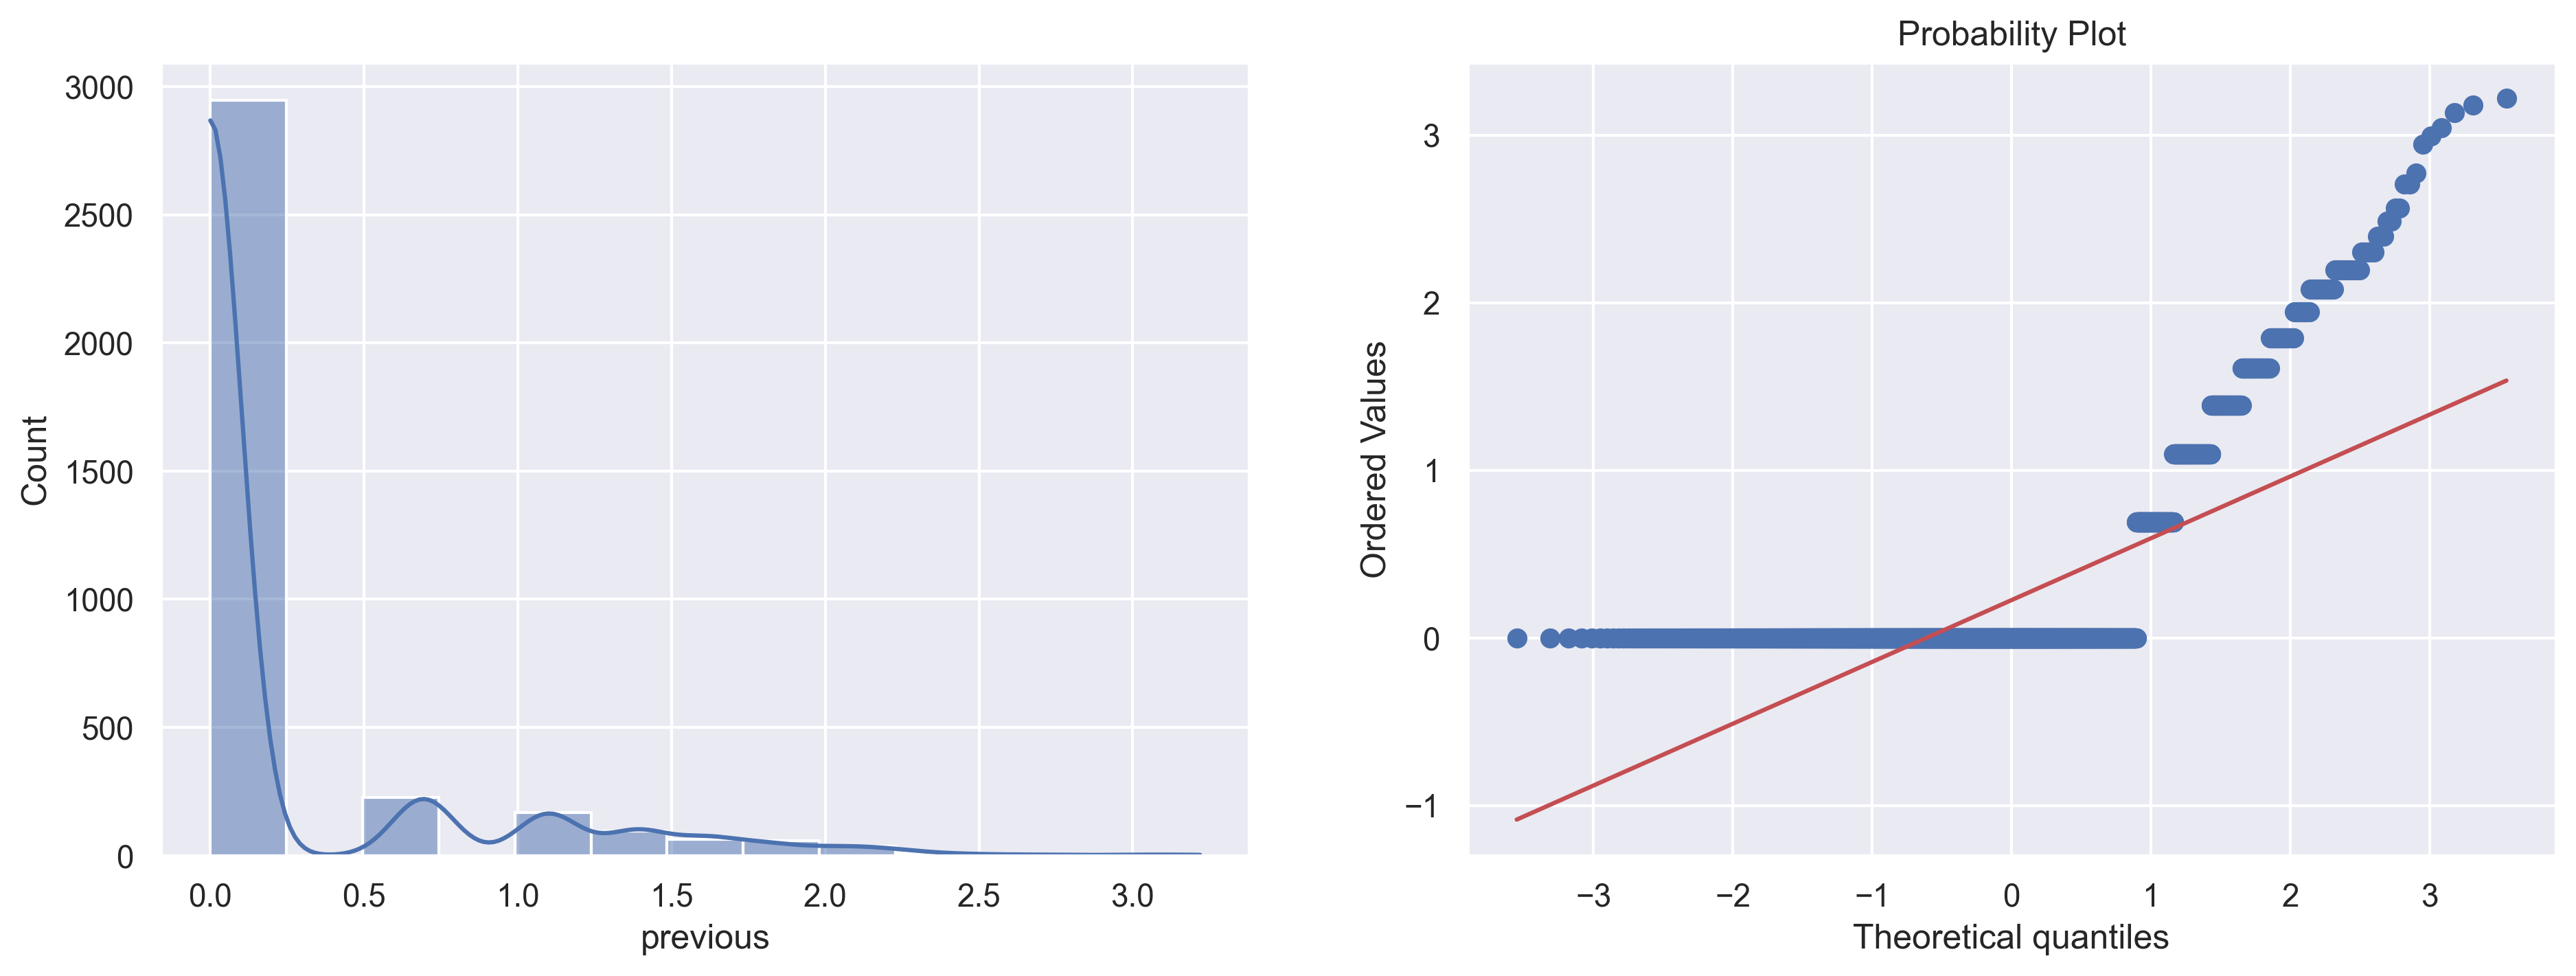

In [27]:
df_trans = df.copy()
for var in exp_featreus:
    df_trans[var] = np.log1p(df_trans[var])
    Gaussian_distribution_check(df, var)
    Gaussian_distribution_check(df_trans, var)

[[-0.21180076  0.72948066]
 [-0.61889431 -1.12988361]
 [-1.23634747  0.175709  ]
 ...
 [-0.43431291  0.175709  ]
 [ 0.35390645  1.05078554]
 [ 0.97941933 -1.12988361]]


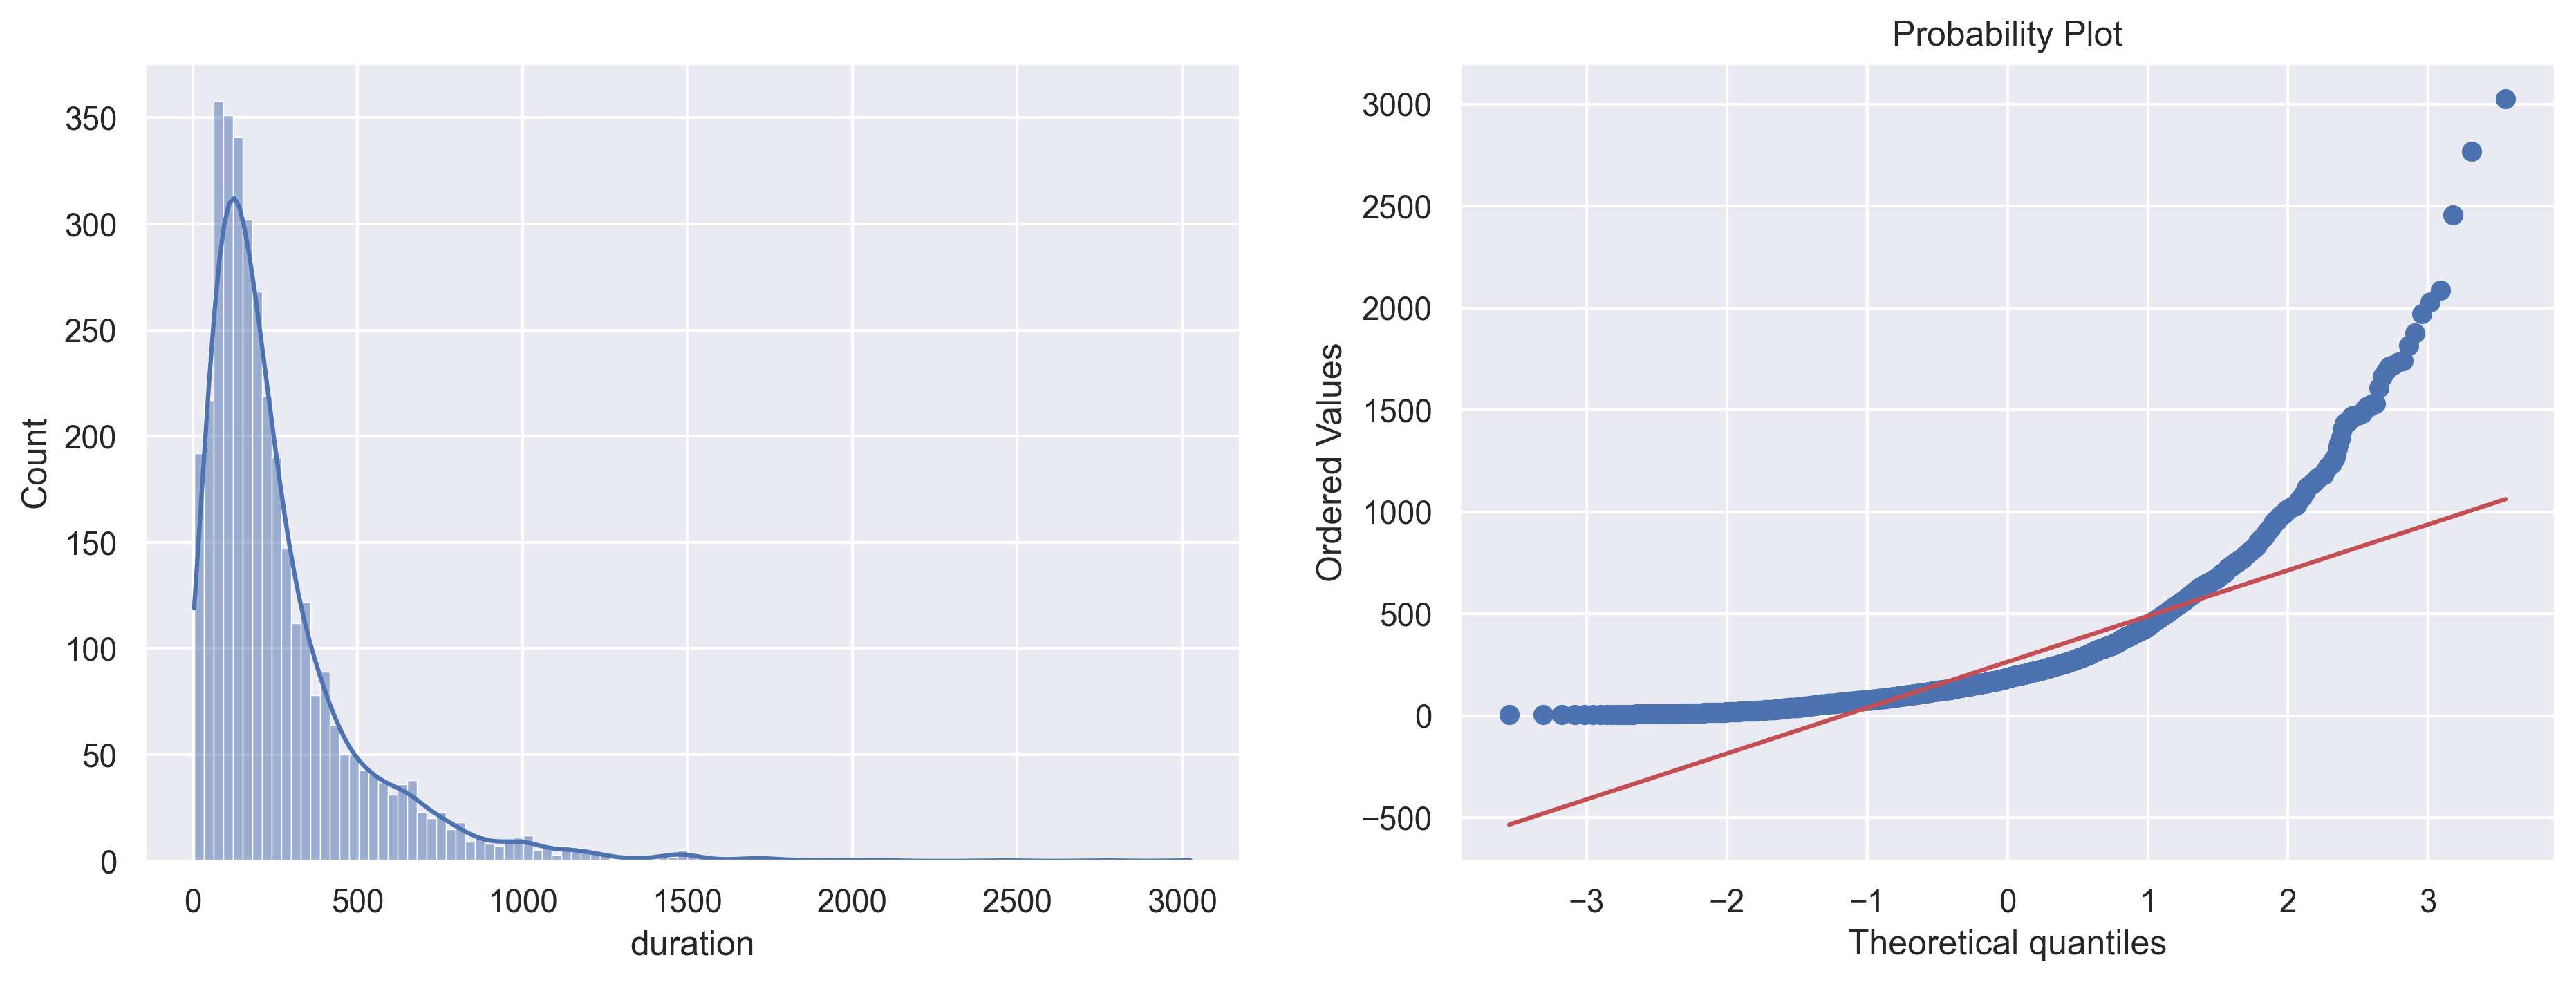

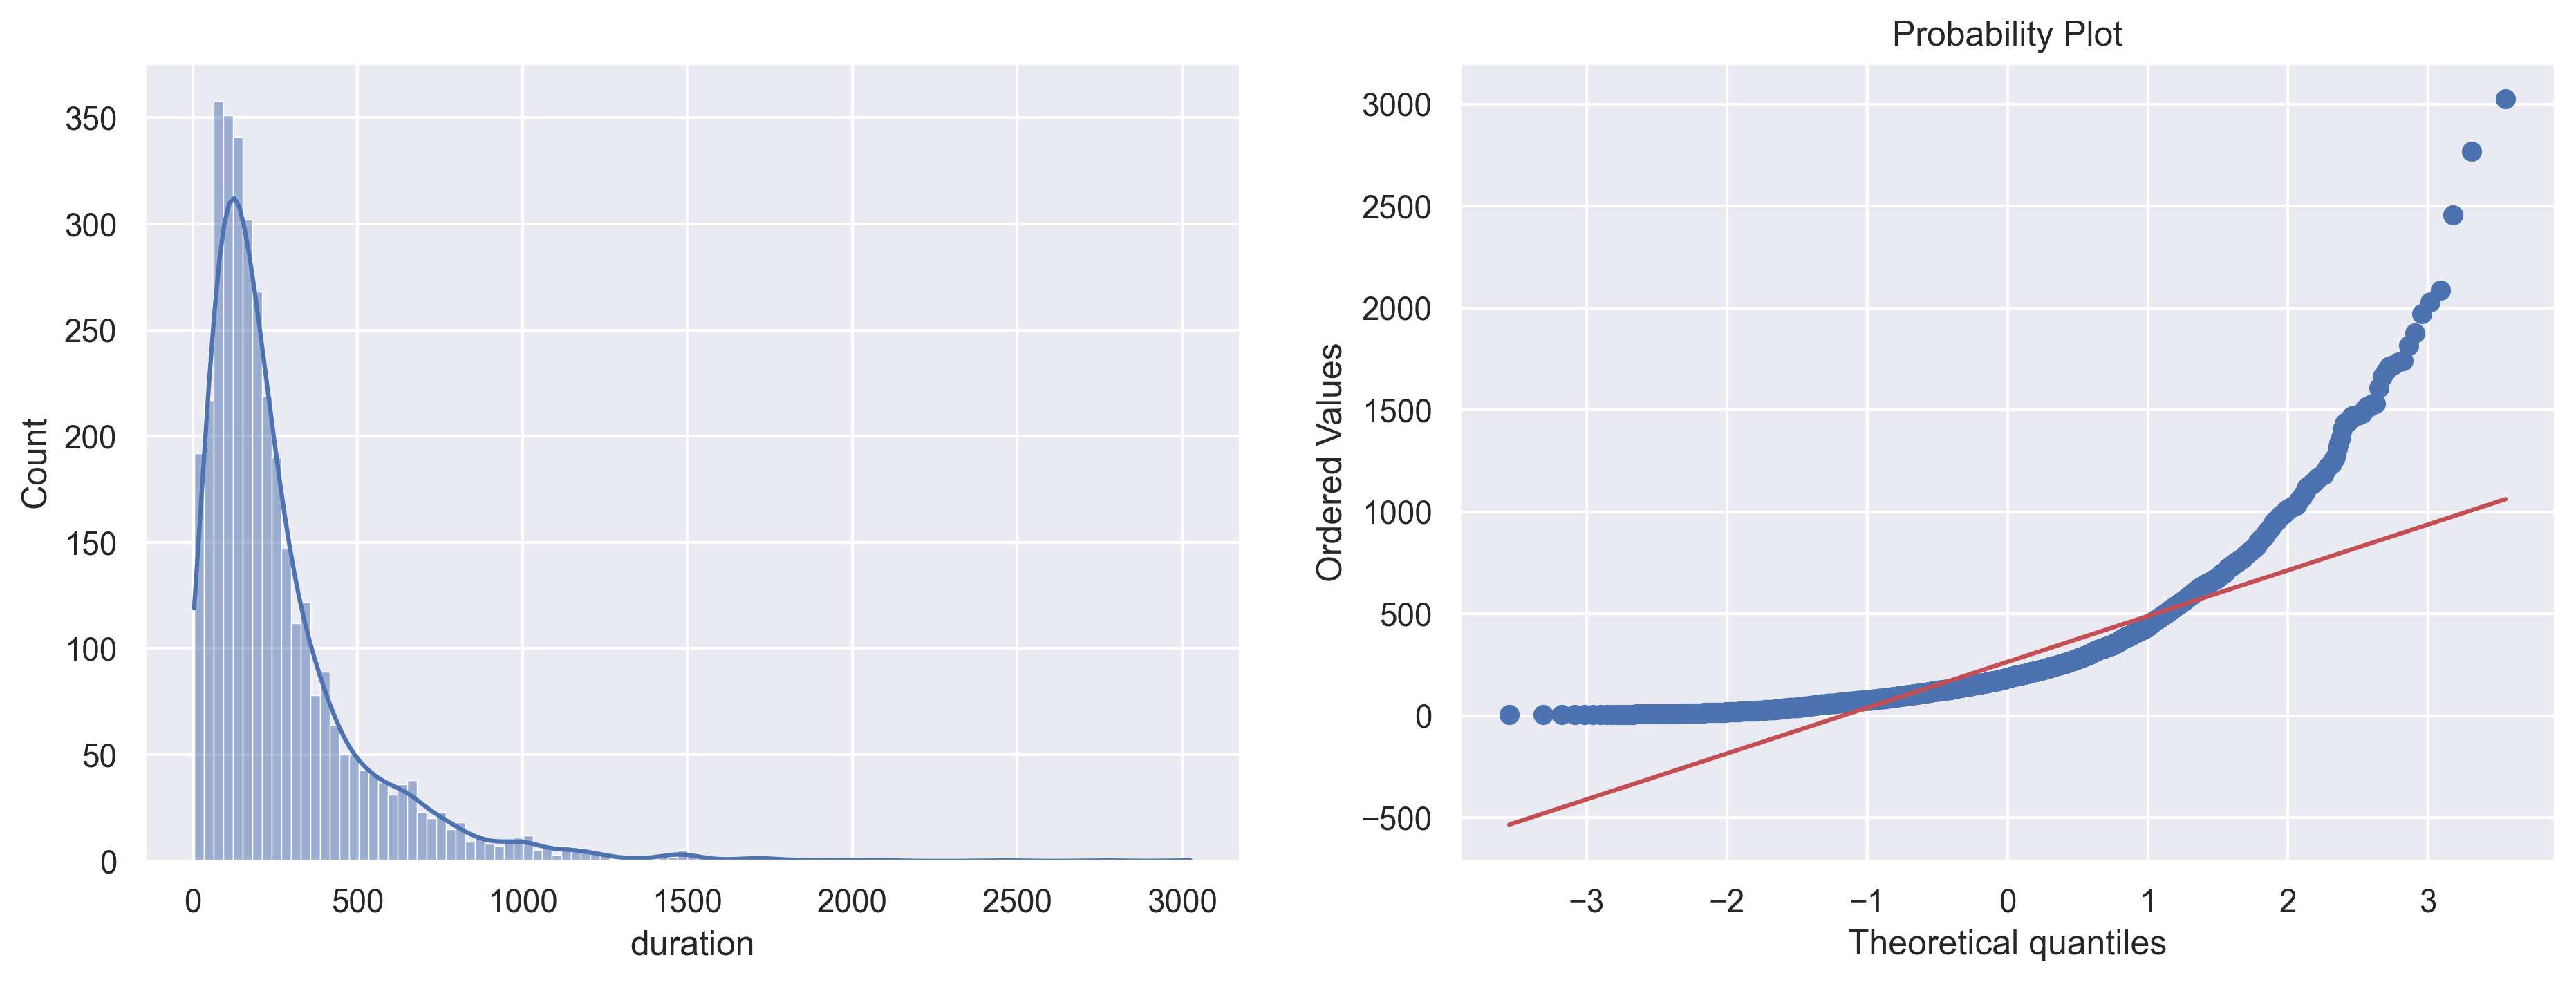

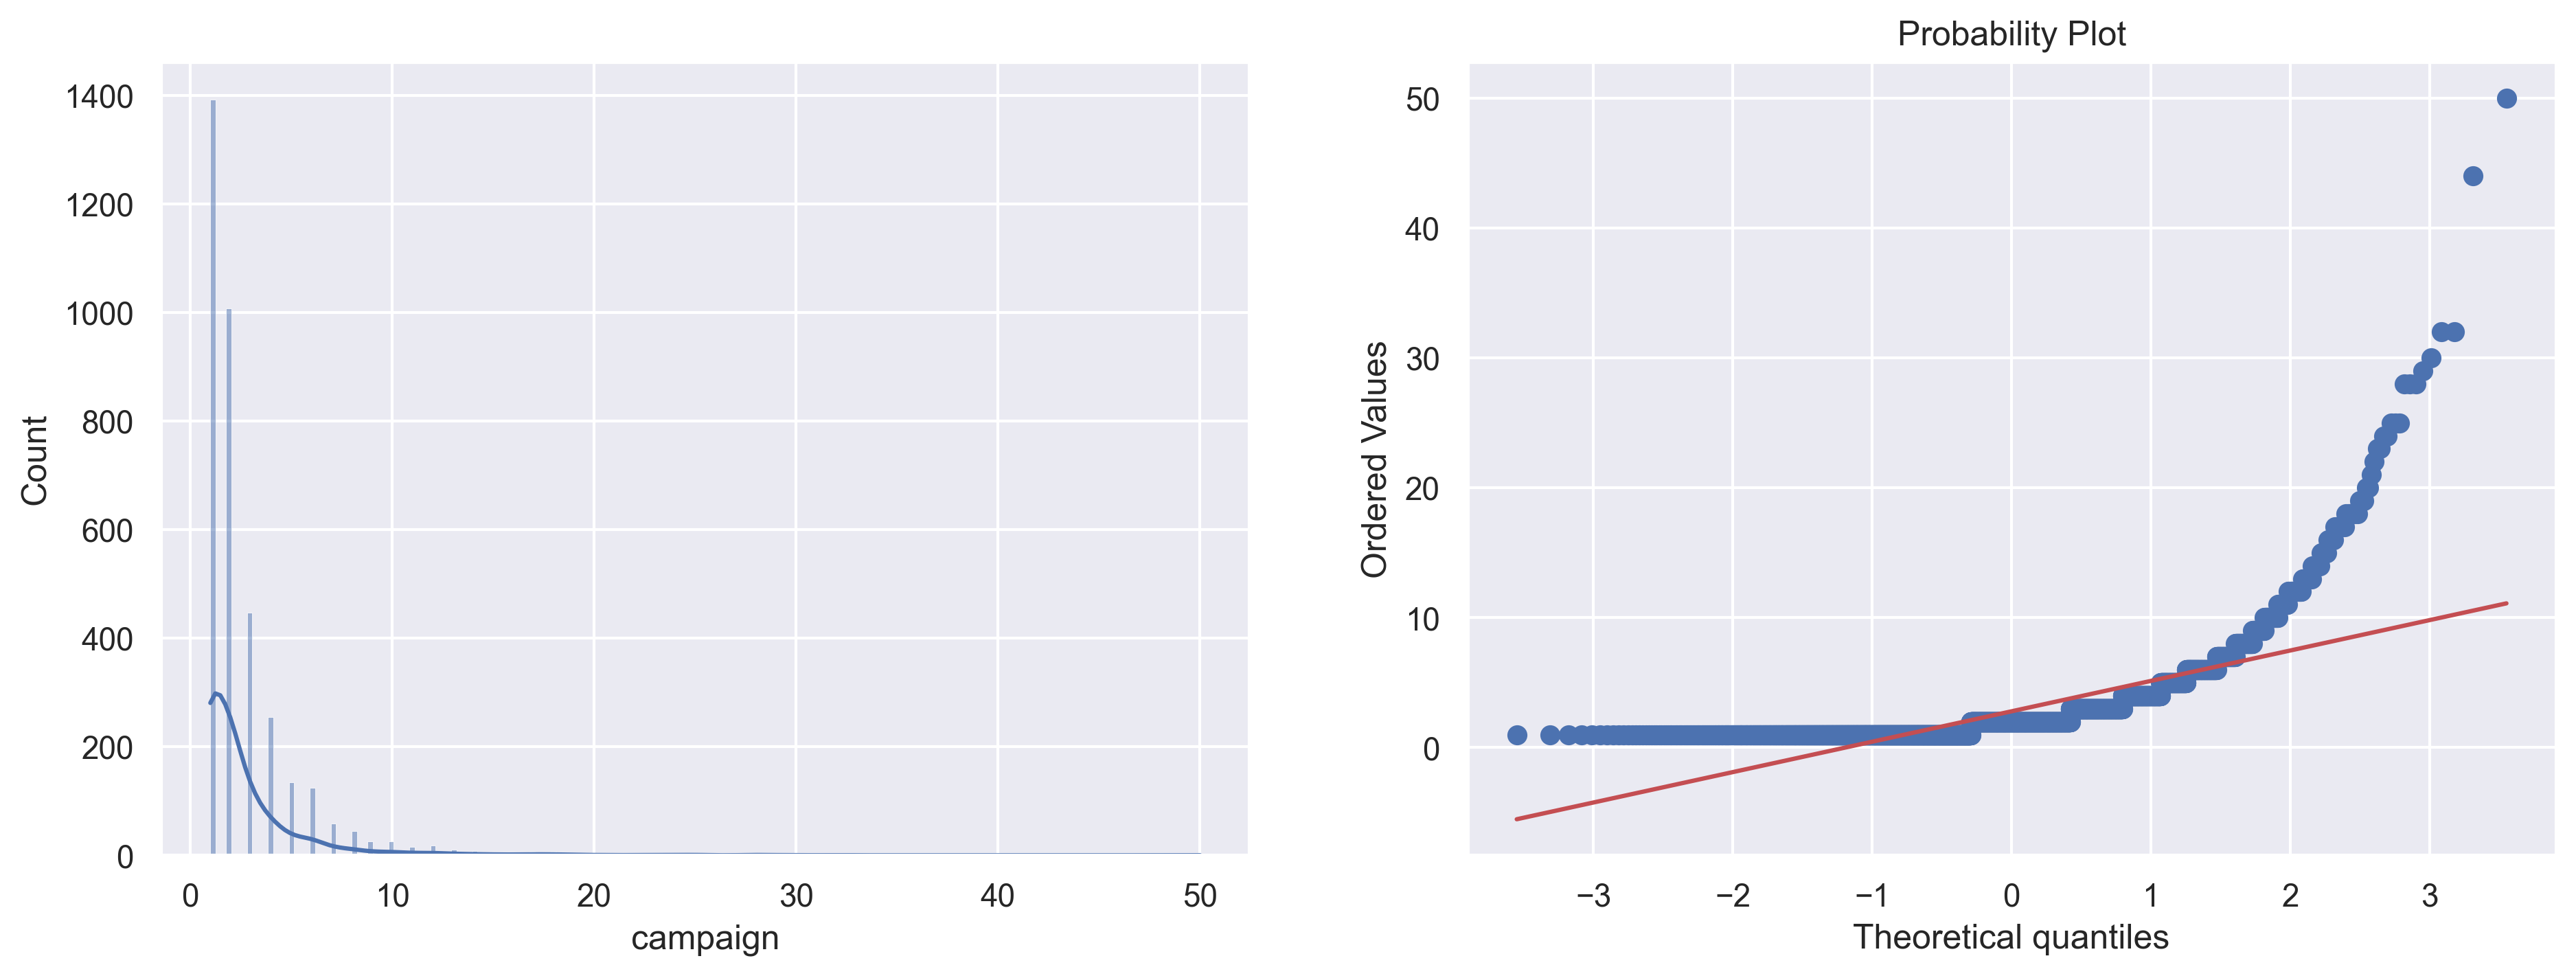

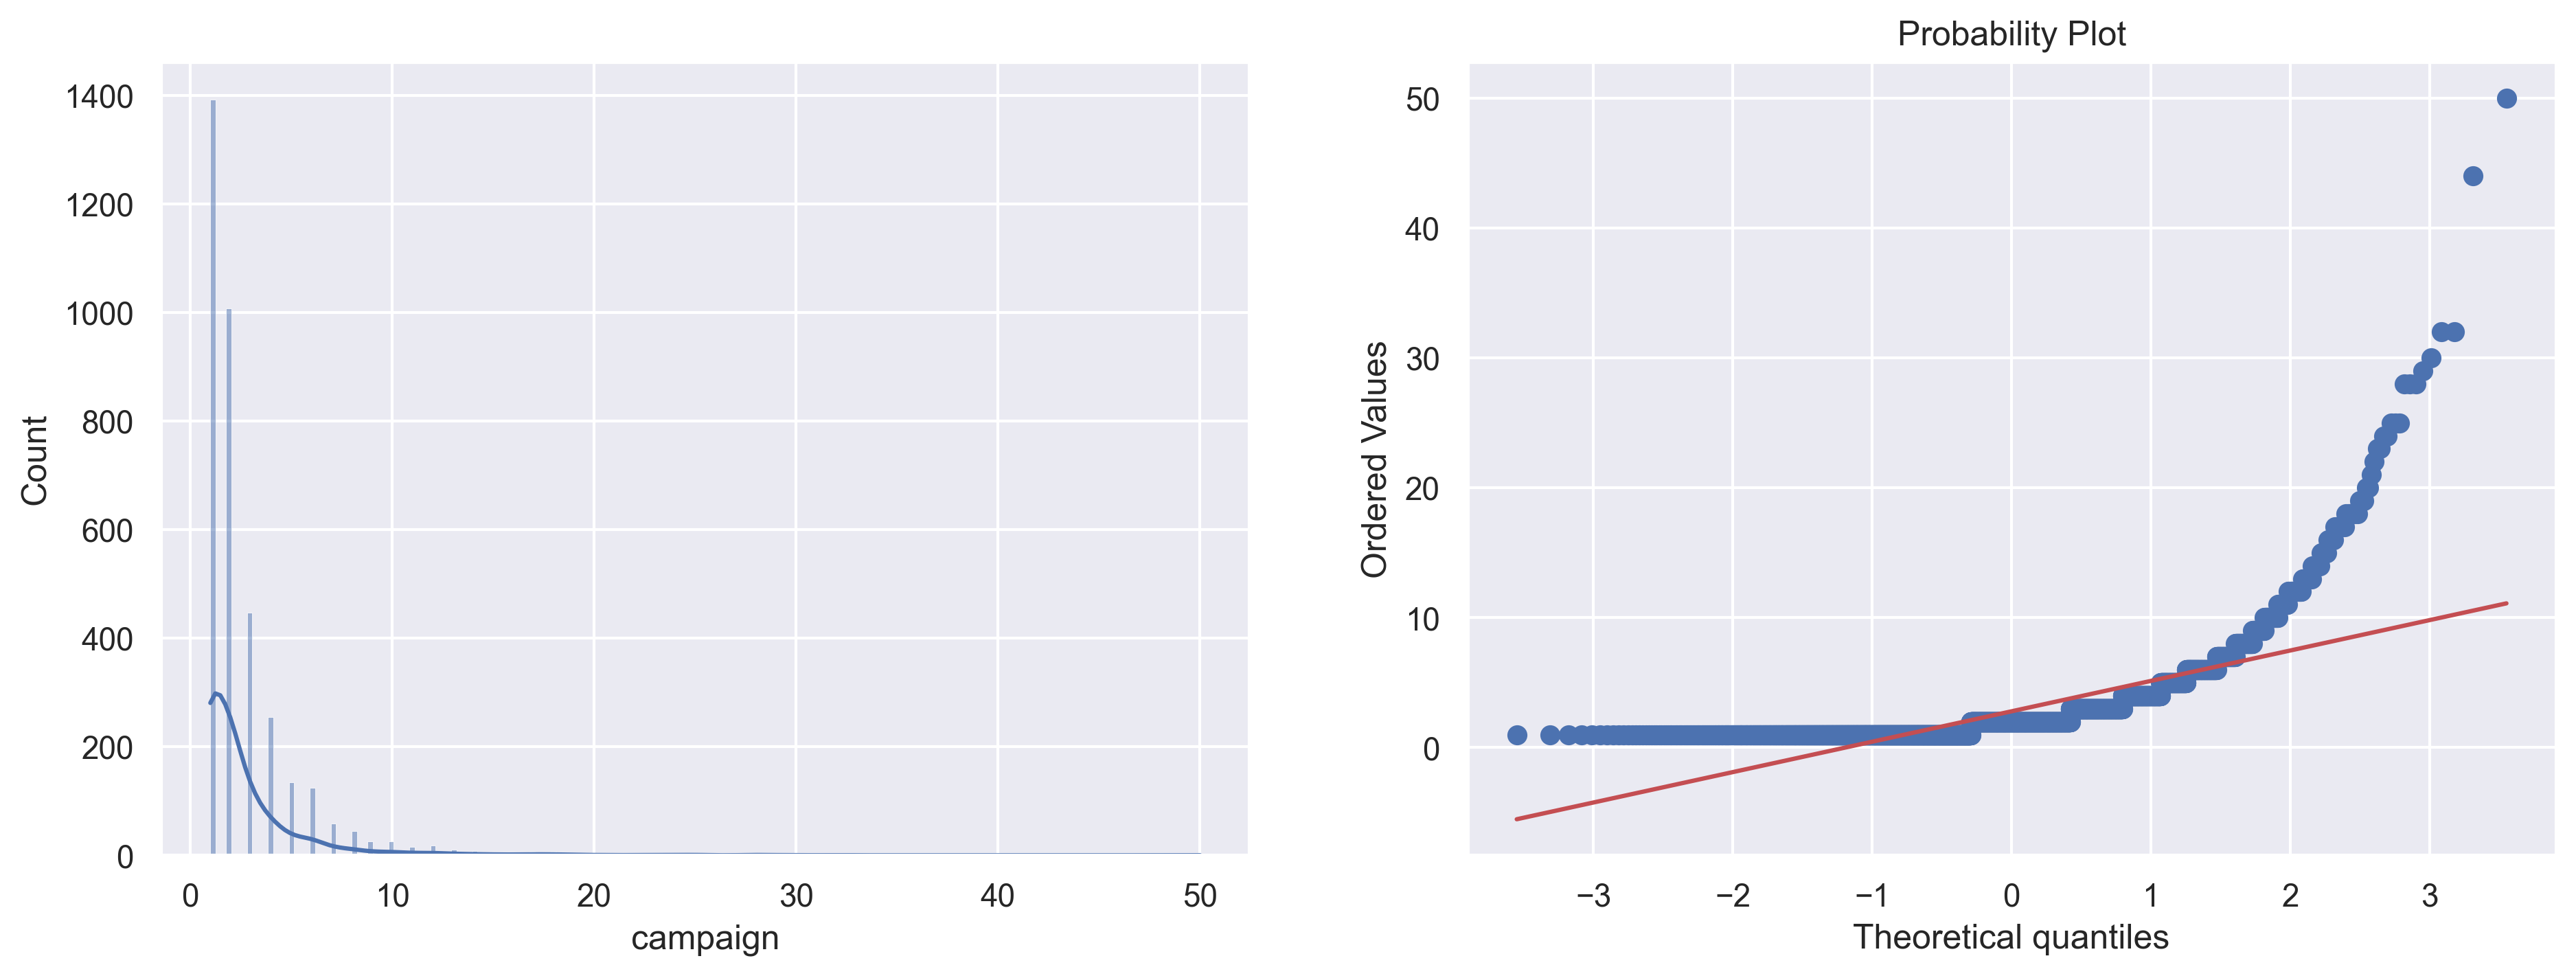

In [28]:
from sklearn.preprocessing import power_transform
df_trans2 = df.copy()
print(power_transform(df_trans2[['duration', 'campaign']], method='box-cox'))
for var in [ 'duration', 'campaign']:
    df_trans[var] = np.log1p(df_trans2[var])
    Gaussian_distribution_check(df, var)
    Gaussian_distribution_check(df_trans2, var)

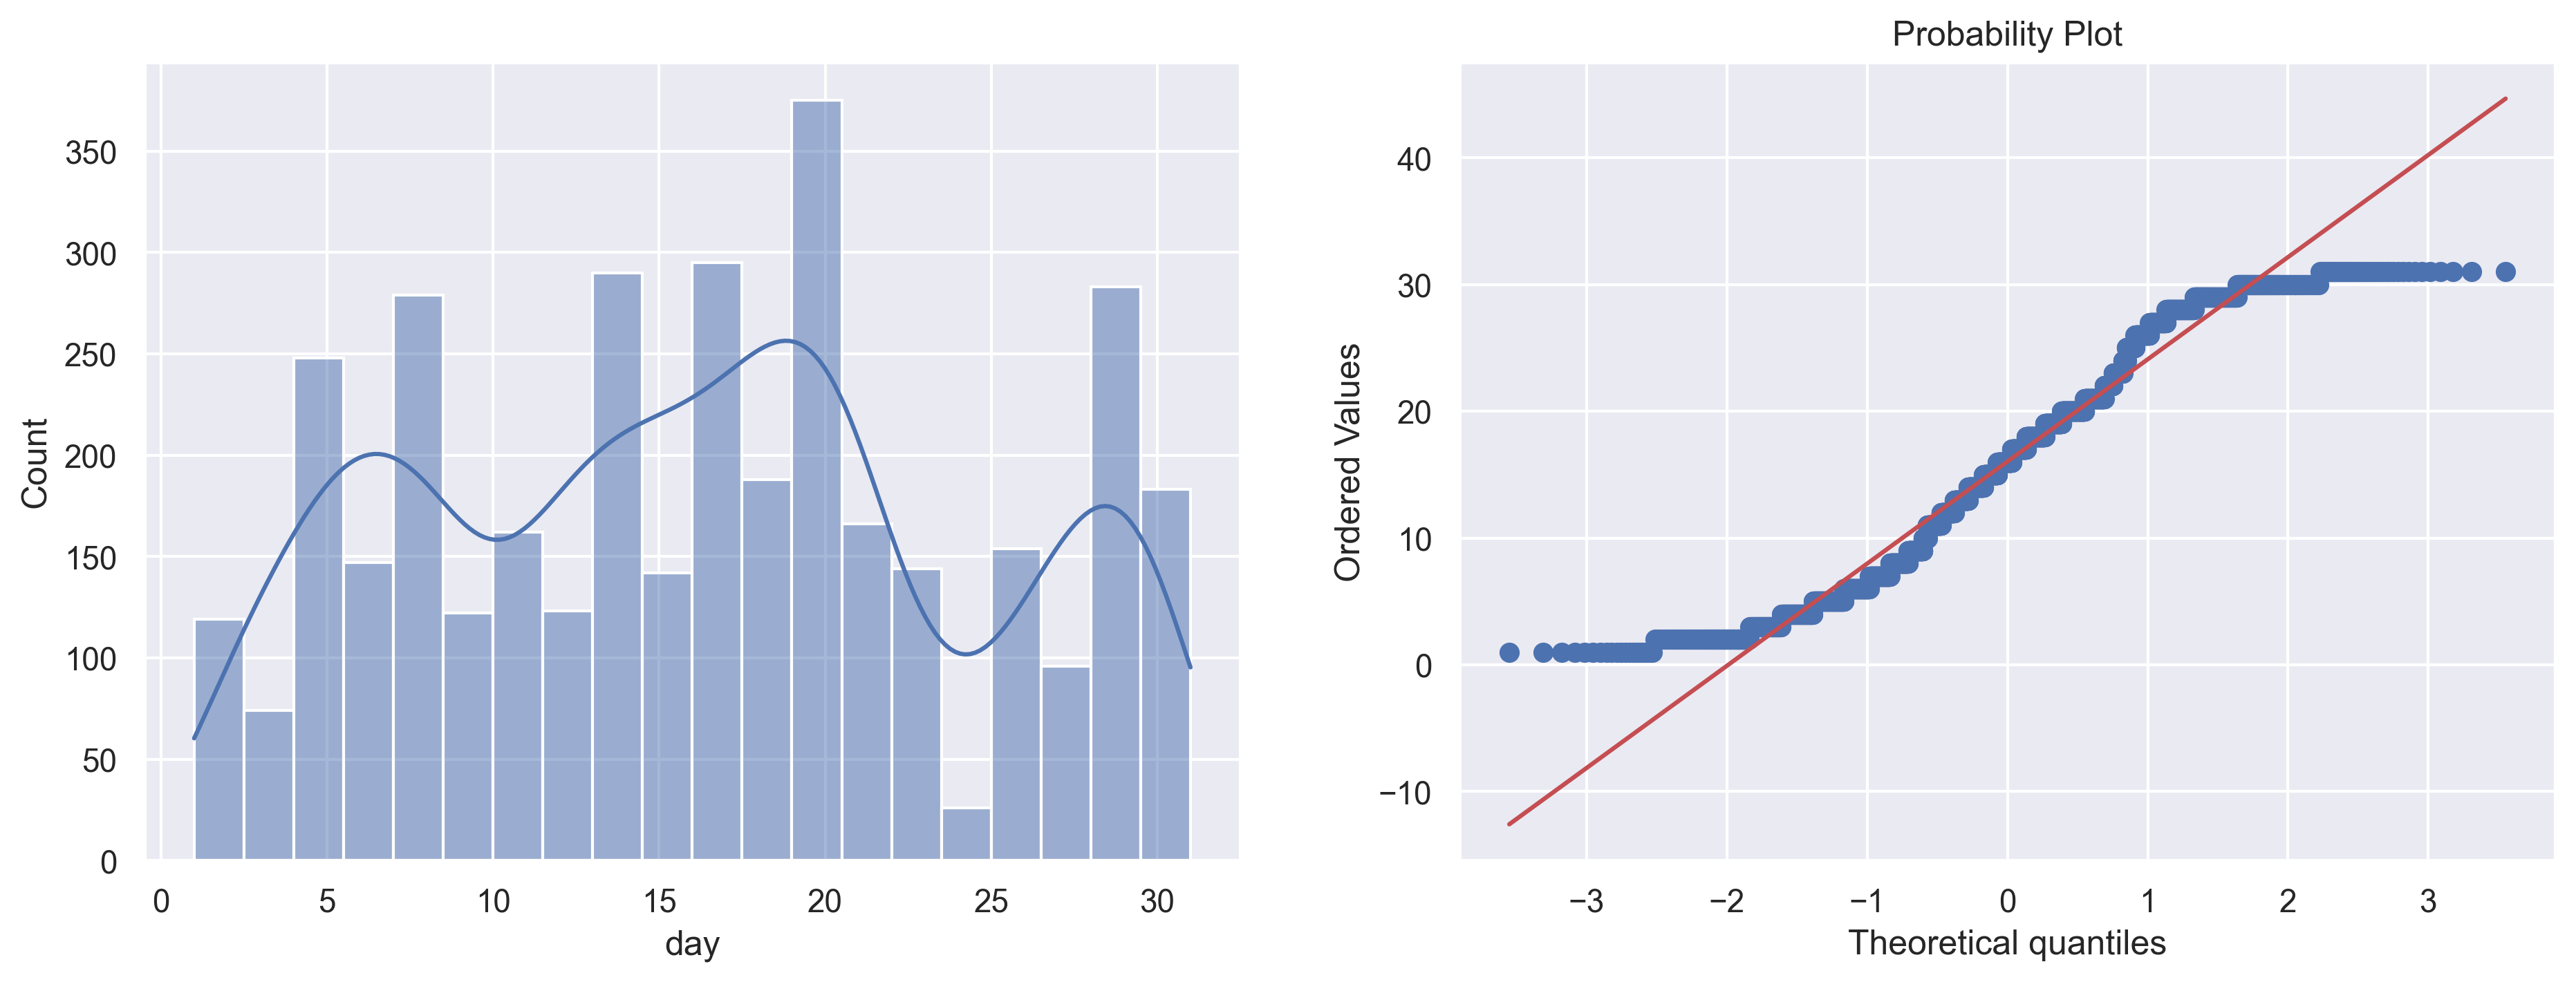

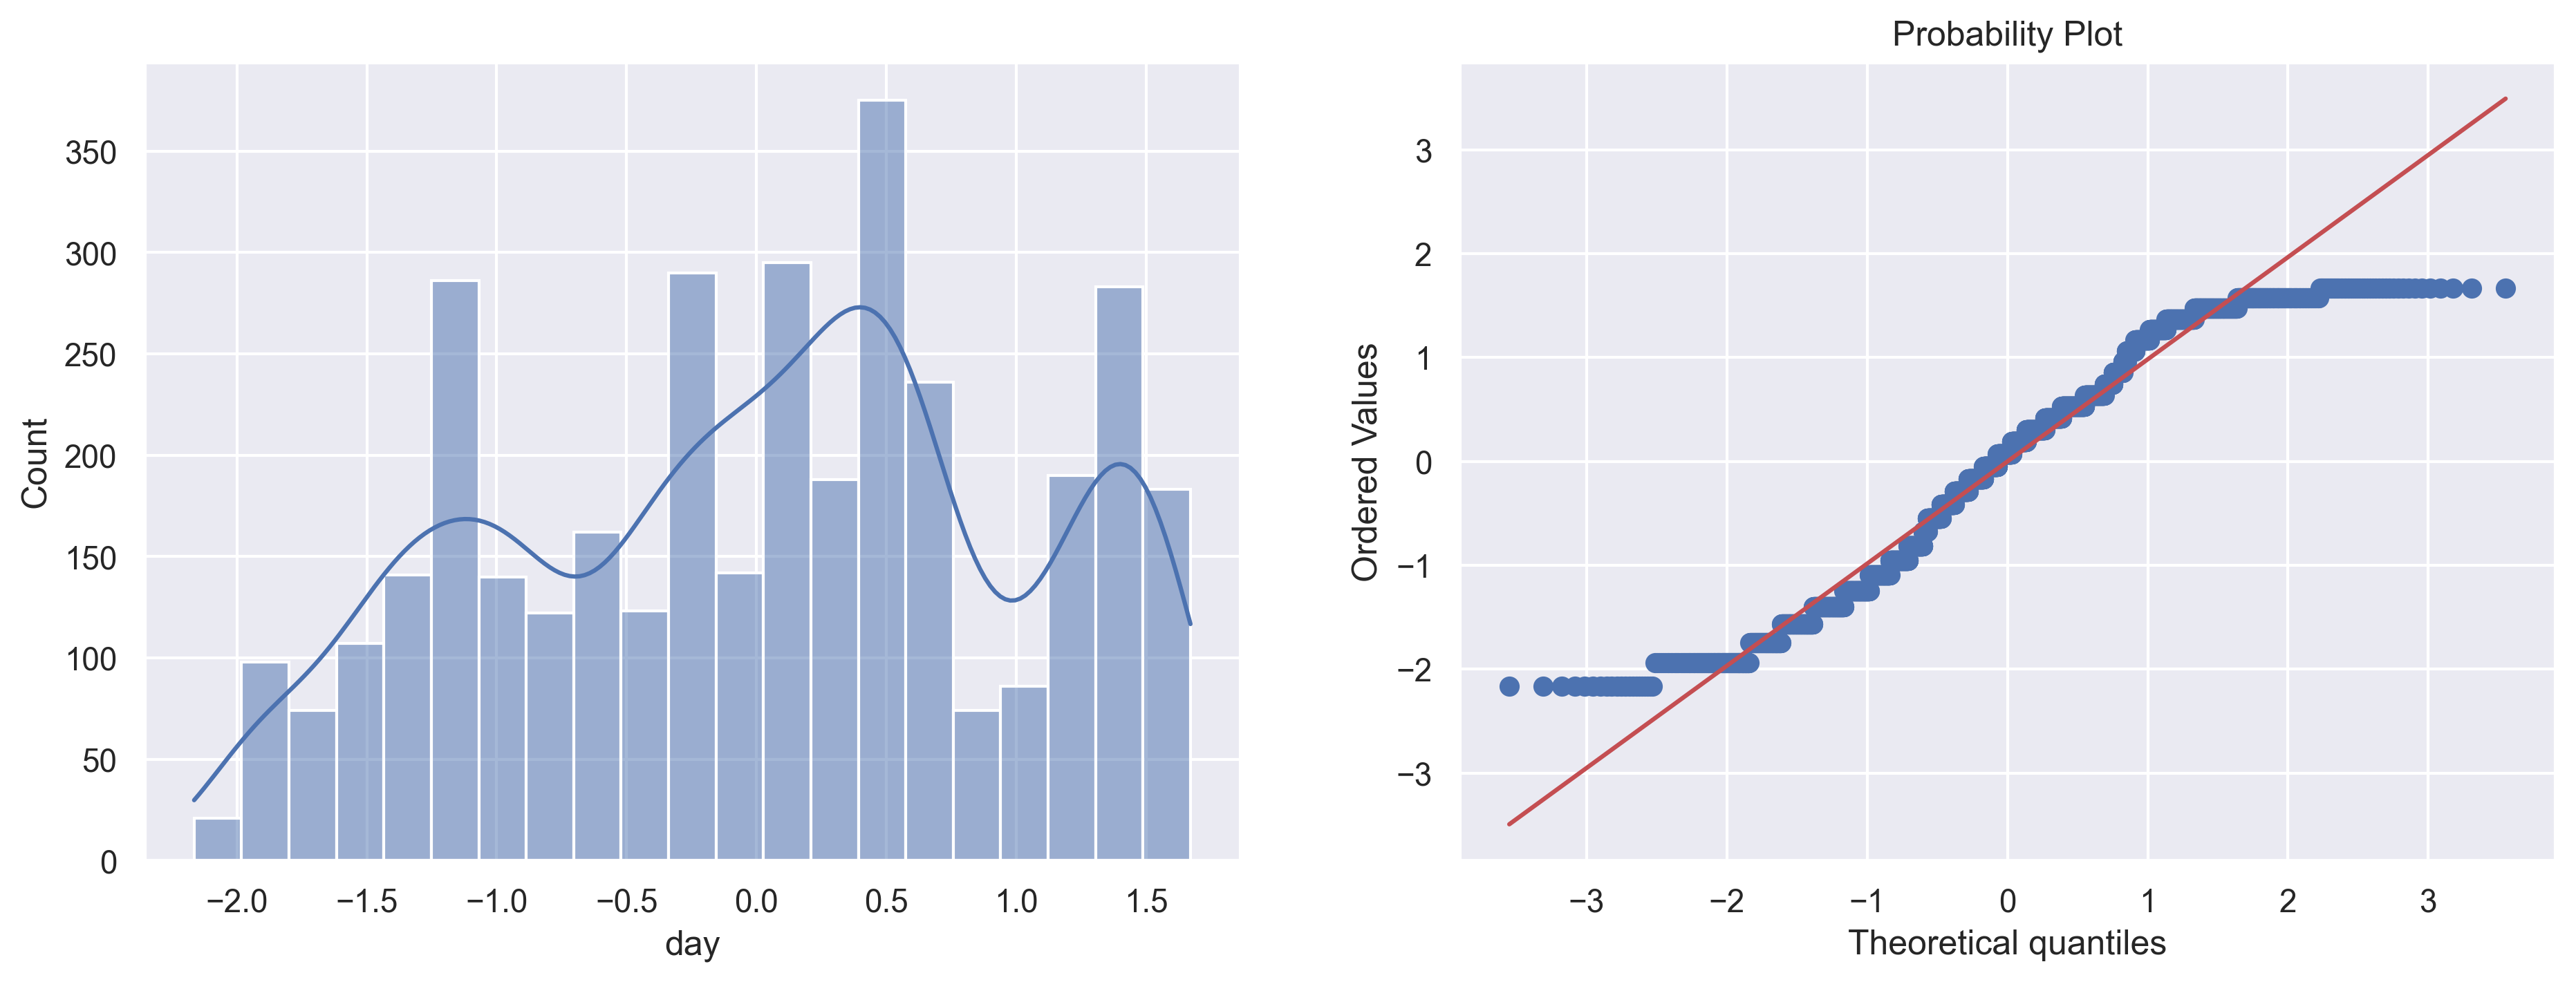

In [31]:
#power.fit_transform(california_housing[['MedHouseVal']])
df_trans3 = df.copy()
df_trans3['day'] = power_transform(df_trans3[['day']], method='box-cox')
Gaussian_distribution_check(df, 'day')
Gaussian_distribution_check(df_trans3, 'day')


C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


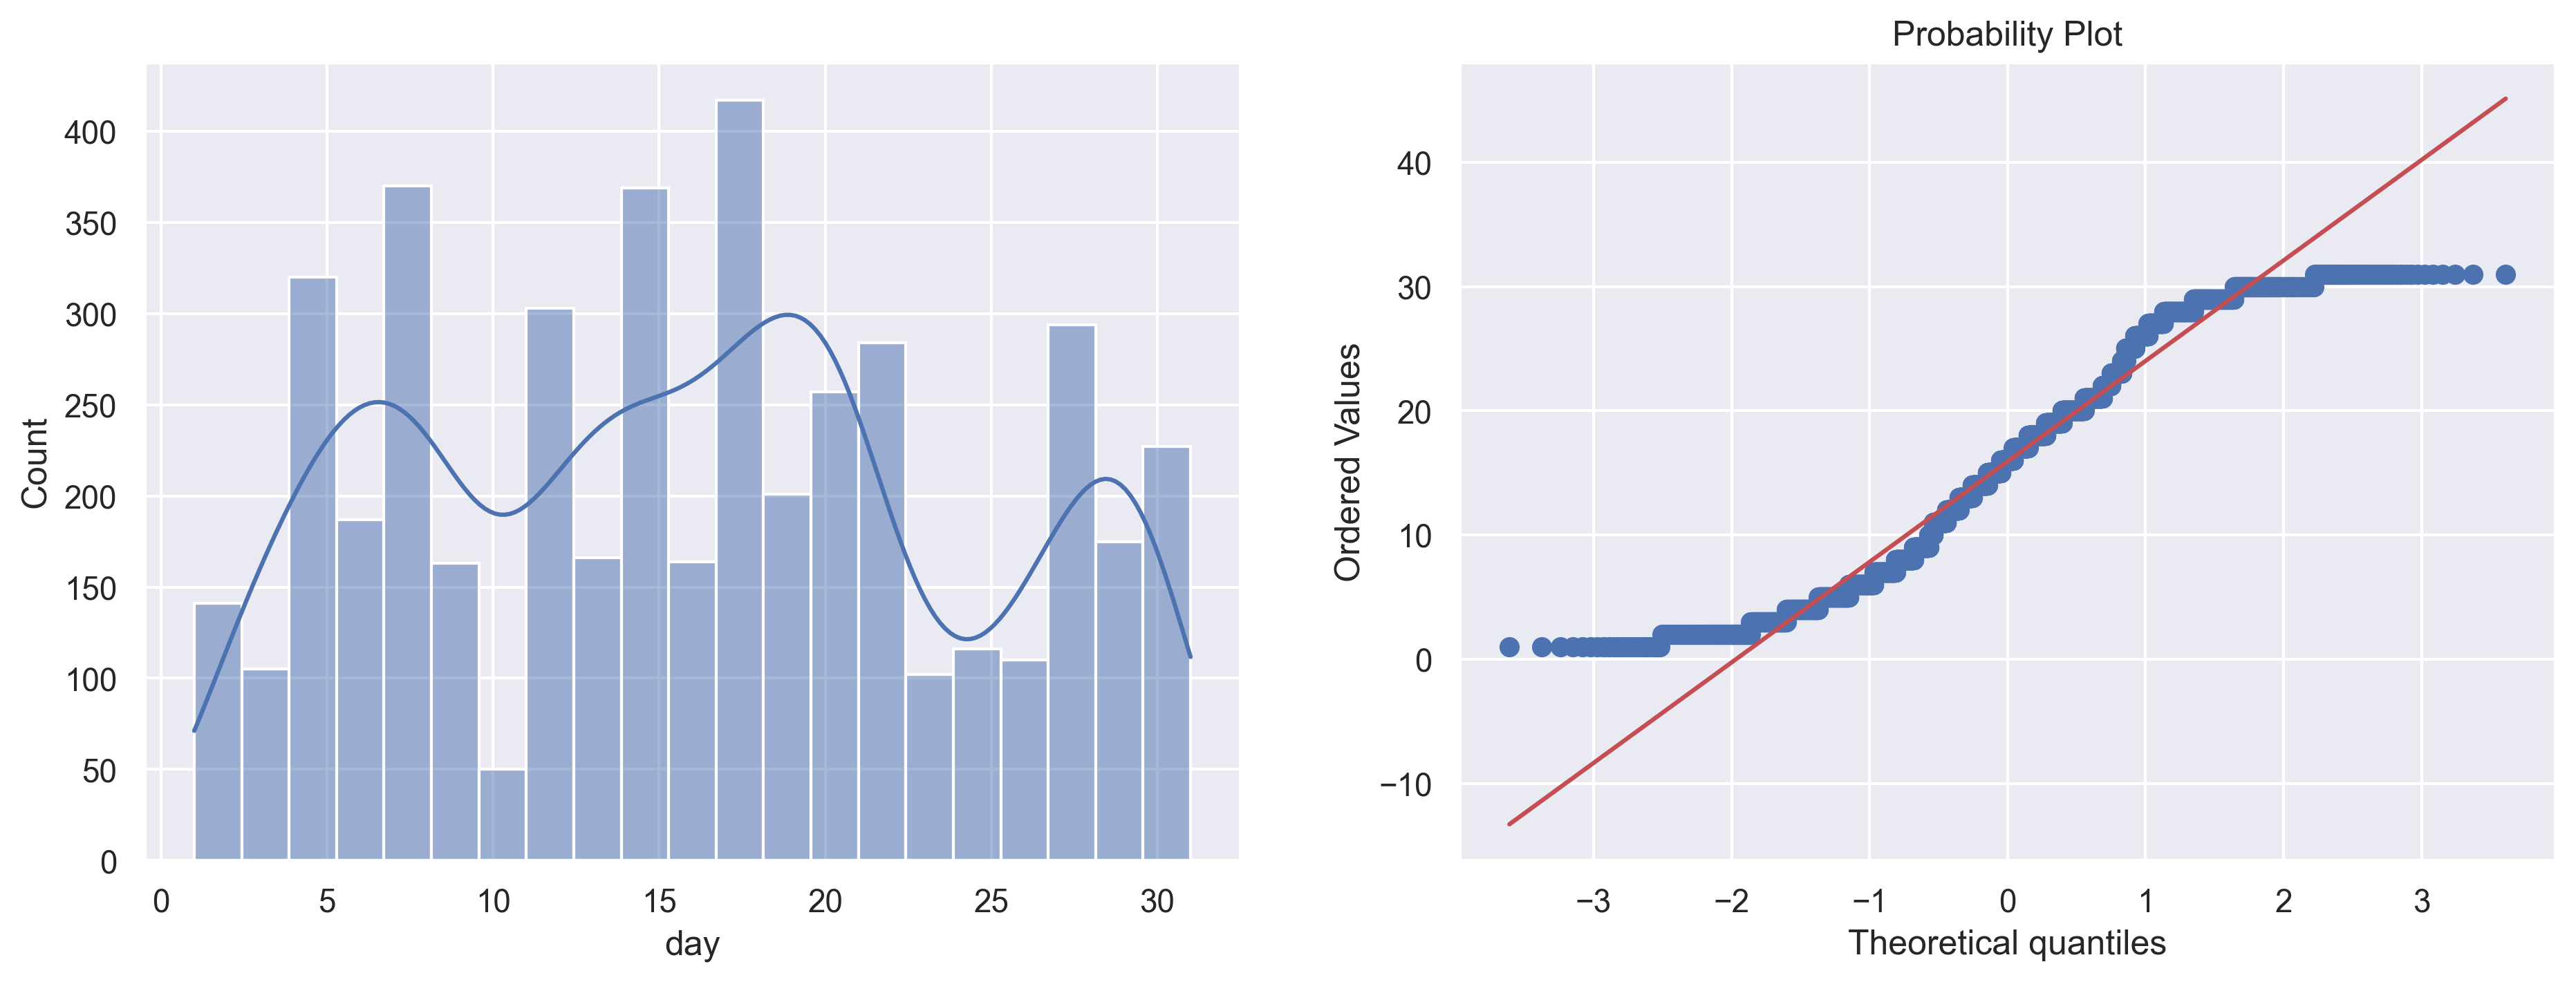

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


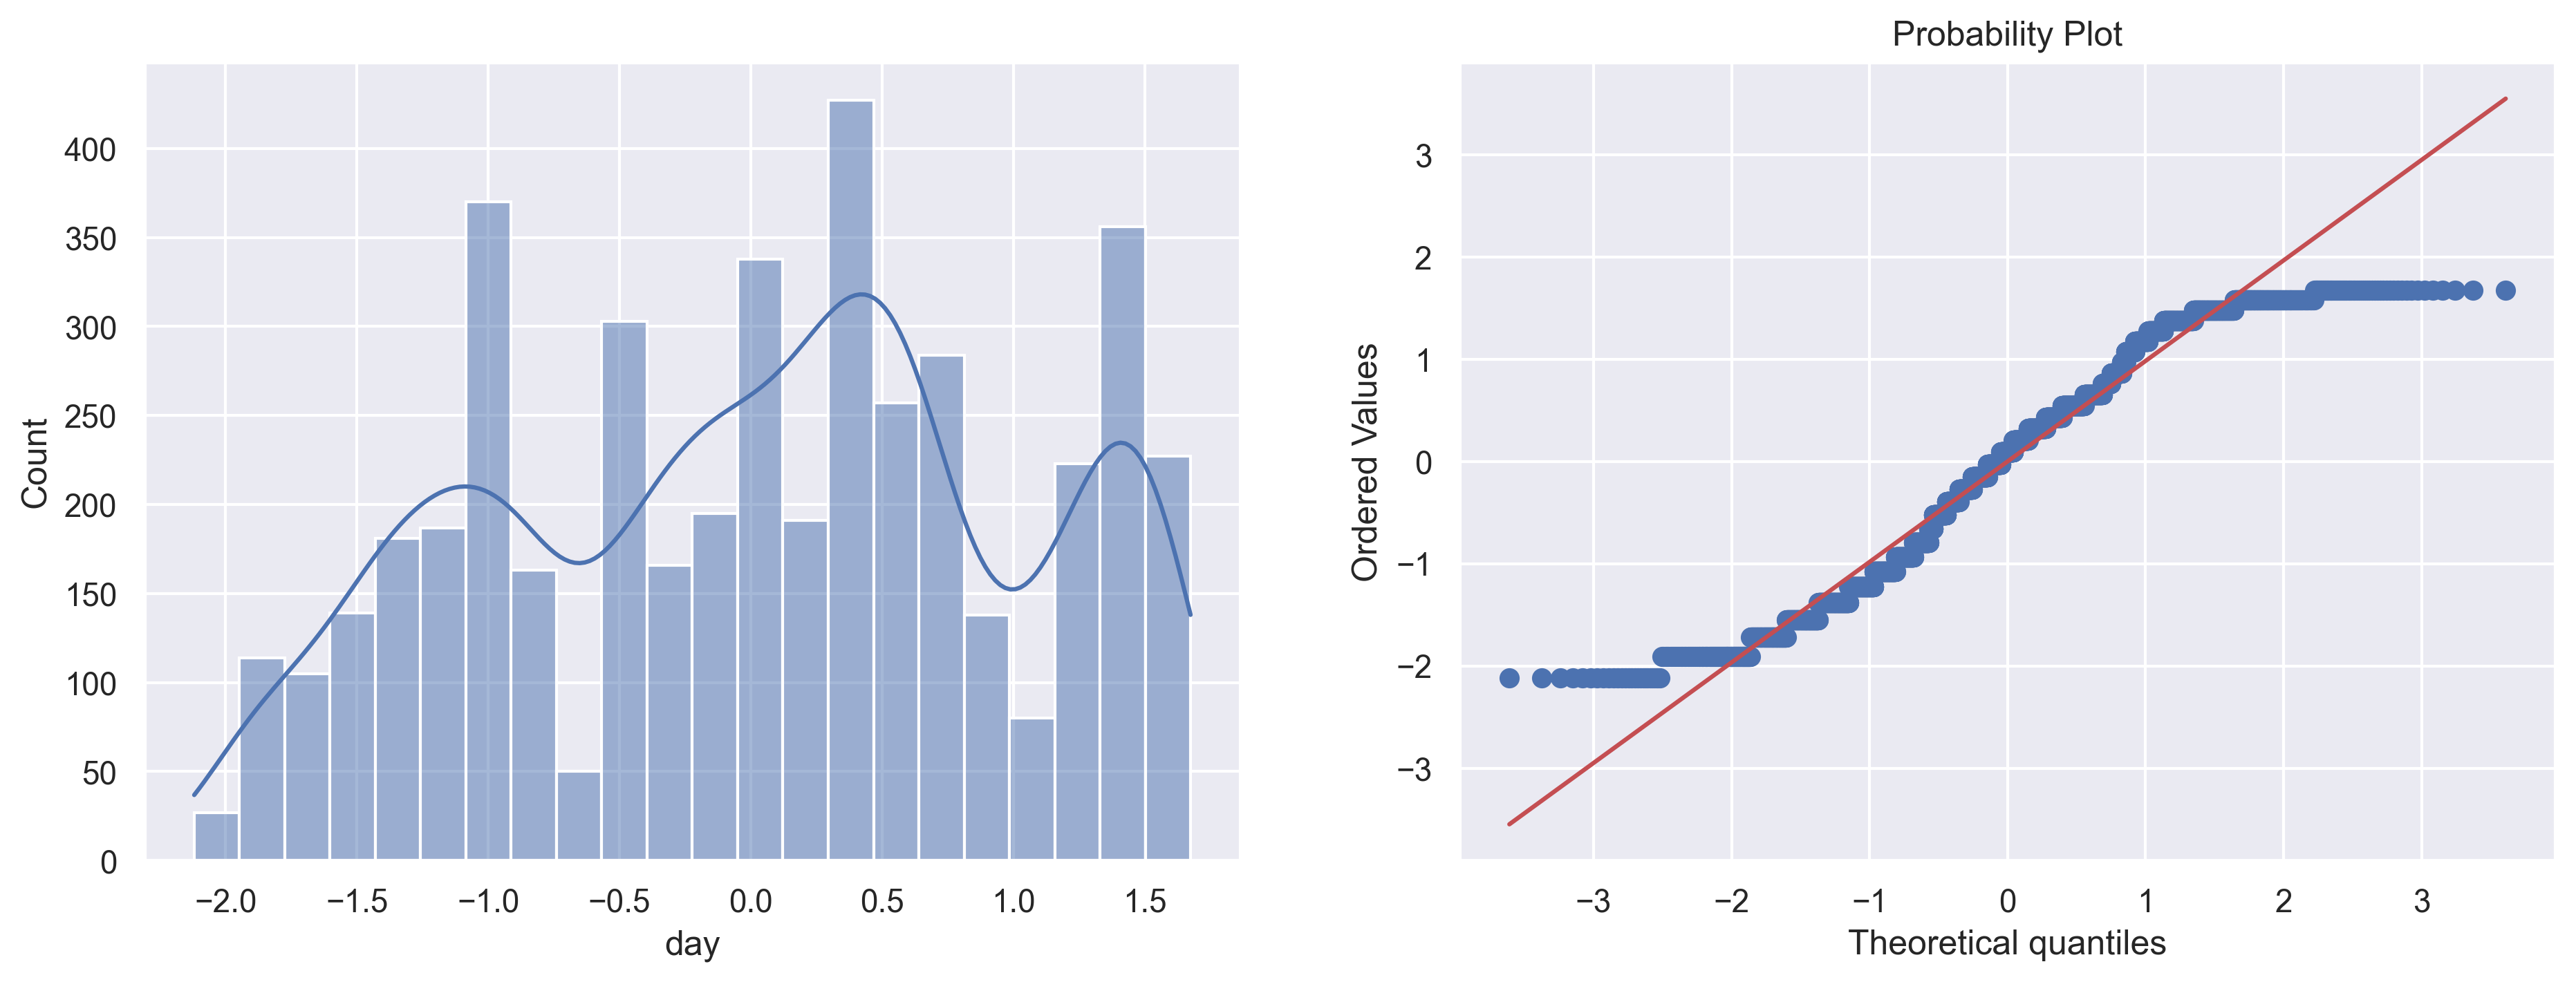

In [ ]:
df_trans4 = df.copy()
df_trans4['day'] = power_transform(df_trans4[['day']], method='yeo-johnson')
Gaussian_distribution_check(df, 'day')
Gaussian_distribution_check(df_trans4, 'day')